In [ ]:
pip install prophet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 65 kB 2.4 MB/s 
     |████████████████████████████████| 49 kB 5.2 MB/s 
     |████████████████████████████████| 45 kB 3.0 MB/s 
  Created wheel for prophet: filename=prophet-1.0.1-py3-none-any.whl size=6641278 sha256=b2cd9ca9e1d34f1c0af487fe6b68f5f4596ab4039079eb08071f583c8410a67f
  Stored in directory: /root/.cache/pip/wheels/4e/a0/1a/02c9ec9e3e9de6bdbb3d769d11992a6926889d71567d6b9b67
Successfully built prophet
  Attempting uninstall: cmdstanpy
    Found existing installation: cmdstanpy 0.9.5
    Uninstalling cmdstanpy-0.9.5:
      Successfully uninstalled cmdstanpy-0.9.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
fbprophet 0.7.1 requires cmdstanpy==0.9.5, but you have cmdstanpy 0.9.68 which is incompatible.


In [ ]:
# !pip install pmdarima
import pandas as pd
# import numpy as np
import matplotlib.pyplot as plt
from matplotlib.figure import Figure
import seaborn as sns
import plotly.graph_objects as go
from plotly.subplots import make_subplots
# from statsmodels.tsa.arima_model import ARIMA
# from statsmodels.tsa.stattools import adfuller
# from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import mean_squared_error,r2_score, mean_absolute_error,mean_squared_log_error,mean_absolute_percentage_error
# from string import digits
from sklearn.preprocessing import StandardScaler
# from sklearn.neighbors import KNeighborsClassifier
from prophet import Prophet
import numpy as np
# from statsmodels.tsa.seasonal import seasonal_decompose
import warnings
warnings.filterwarnings("ignore")

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
!gdown --id 1igSUrpjgVWt-aDxJ13HptHk55oLXgexu

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1igSUrpjgVWt-aDxJ13HptHk55oLXgexu
To: /content/Dataset Saham.zip
100% 113k/113k [00:00<00:00, 45.3MB/s]


In [ ]:
import zipfile

folder_path = '/content/Dataset Saham.zip'
openZip = zipfile.ZipFile(folder_path, 'r')
openZip.extractall('/content')
openZip.close()

In [ ]:
df_date = pd.DataFrame({
    'Date' : pd.date_range(start="2017-01-01",end="2022-05-20")
})

# BBCA

In [ ]:
df_bca = pd.read_csv('/content/BBCA.JK.csv')
df_bca['Date'] = pd.to_datetime(df_bca['Date'])
df_bca

,Date,Open,High,Low,Close,Adj Close,Volume
0,2009-01-05,700.0,700.0,650.0,700.0,562.346069,76682500
1,2009-01-06,700.0,740.0,690.0,700.0,562.346069,86082500
2,2009-01-07,715.0,715.0,630.0,675.0,542.262268,65045000
3,2009-01-08,625.0,640.0,620.0,625.0,502.094666,53797500
4,2009-01-09,600.0,630.0,595.0,600.0,482.010956,59930000
...,...,...,...,...,...,...,...
3308,2022-05-17,7275.0,7475.0,7275.0,7400.0,7400.000000,159657600
3309,2022-05-18,7500.0,7575.0,7375.0,7575.0,7575.000000,153514300
3310,2022-05-19,7400.0,7475.0,7375.0,7450.0,7450.000000,140908900
3311,2022-05-20,7425.0,7475.0,7400.0,7400.0,7400.000000,86520200


In [ ]:
new_df_bca = df_bca.merge(df_date, on=['Date'], how='right')
new_df_bca

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-01-01,NaN,NaN,NaN,NaN,NaN,NaN
1,2017-01-02,3100.0,3100.0,3100.0,3100.0,2841.574707,0.0
2,2017-01-03,3100.0,3155.0,3045.0,3155.0,2891.989746,46748000.0
3,2017-01-04,3170.0,3175.0,3130.0,3140.0,2878.239746,85216500.0
4,2017-01-05,3140.0,3155.0,3125.0,3135.0,2873.657227,97909000.0
...,...,...,...,...,...,...,...
1961,2022-05-16,NaN,NaN,NaN,NaN,NaN,NaN
1962,2022-05-17,7275.0,7475.0,7275.0,7400.0,7400.000000,159657600.0
1963,2022-05-18,7500.0,7575.0,7375.0,7575.0,7575.000000,153514300.0
1964,2022-05-19,7400.0,7475.0,7375.0,7450.0,7450.000000,140908900.0


In [ ]:
bca_full = new_df_bca[['Date','Close']]
bca_full['Close'] = bca_full['Close'].interpolate(method='linear',limit_direction ='forward')
bca_full = bca_full[1:].reset_index(drop=True)
bca_full

,Date,Close
0,2017-01-02,3100.00
1,2017-01-03,3155.00
2,2017-01-04,3140.00
3,2017-01-05,3135.00
4,2017-01-06,3120.00
...,...,...
1960,2022-05-16,7381.25
1961,2022-05-17,7400.00
1962,2022-05-18,7575.00
1963,2022-05-19,7450.00


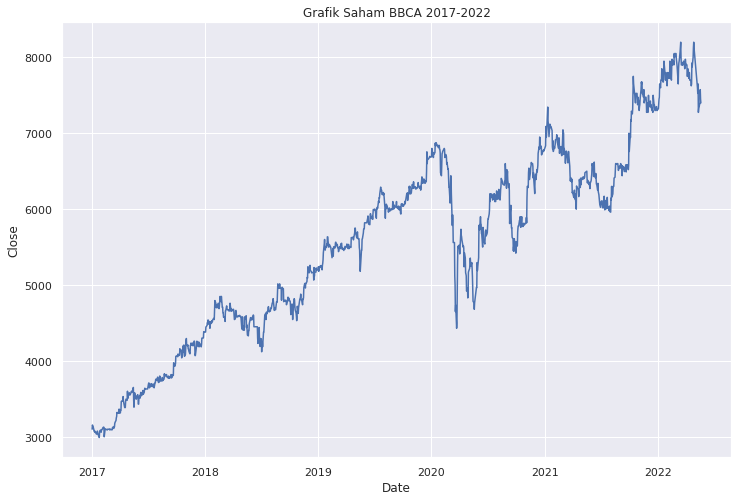

In [ ]:
plt.figure(figsize=(12,8))
sns.lineplot(data=bca_full, x='Date',y='Close')
plt.title('Grafik Saham BBCA 2017-2022')
sns.set_theme()

In [ ]:
df_pred_bca = pd.DataFrame({
    'ds' : bca_full['Date'],
    'y' : bca_full['Close']
})
df_pred_bca

,ds,y
0,2017-01-02,3100.00
1,2017-01-03,3155.00
2,2017-01-04,3140.00
3,2017-01-05,3135.00
4,2017-01-06,3120.00
...,...,...
1960,2022-05-16,7381.25
1961,2022-05-17,7400.00
1962,2022-05-18,7575.00
1963,2022-05-19,7450.00


## FB Prophet

In [ ]:
train_proph_bca = df_pred_bca.iloc[:-30]
test_proph_bca = df_pred_bca.iloc[-30:]

In [ ]:
m = Prophet(weekly_seasonality=True, yearly_seasonality=True)
m.fit(train_proph_bca)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
future = m.make_future_dataframe(360,include_history=False)

forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head()

,ds,yhat,yhat_lower,yhat_upper
0,2022-04-21,7677.183646,7440.866010,7924.737227
1,2022-04-22,7674.262596,7437.826828,7913.415323
2,2022-04-23,7670.166780,7417.073466,7915.487401
3,2022-04-24,7666.079240,7408.752970,7901.715875
4,2022-04-25,7663.137602,7409.415955,7903.618587


In [ ]:
test_proph_bca.reset_index(inplace=True)

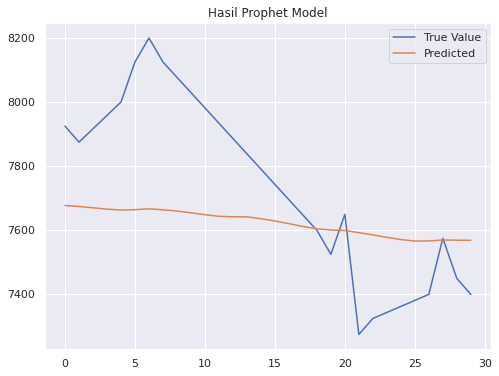

In [ ]:
plt.figure(figsize=(8,6))
test_proph_bca['y'].plot(label='True Value')
forecast['yhat'][:30].plot(label='Predicted')
plt.title('Hasil Prophet Model')
plt.legend()

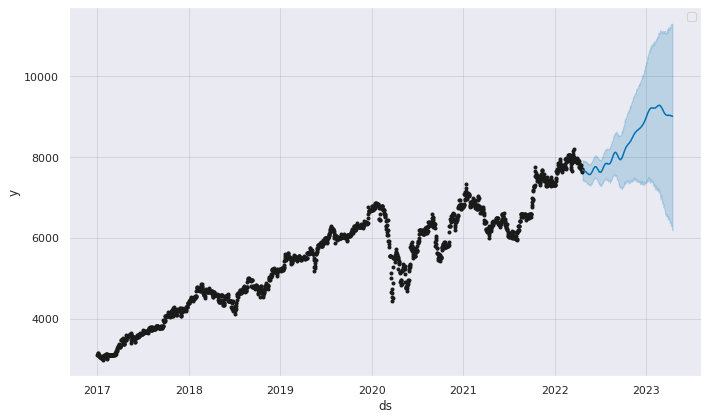

In [ ]:
# only future data

fig1 = m.plot(forecast)
plt.legend()

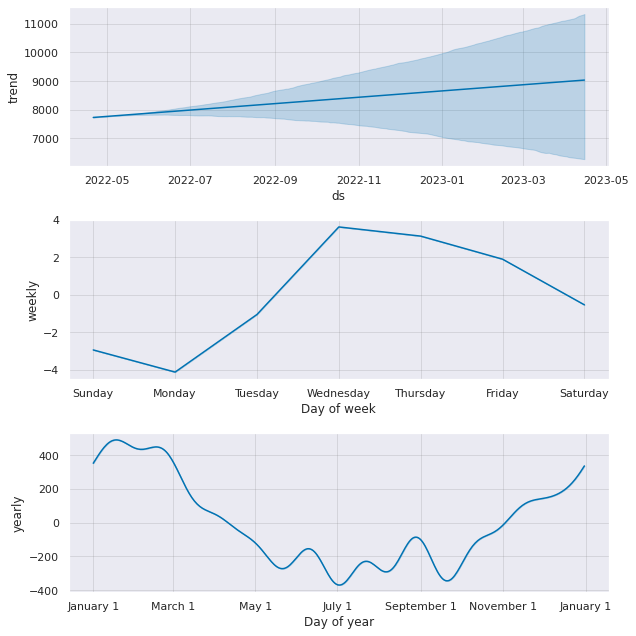

In [ ]:
fig2 = m.plot_components(forecast)

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
# import numpy as np j
print("Prophet Model")
print("MAE: ",mean_absolute_error(test_proph_bca['y'],forecast['yhat'][:30]))
print("MSE: ",mean_squared_error(test_proph_bca['y'],forecast['yhat'][:30]))
print("RMSE: ", np.sqrt(mean_squared_error(test_proph_bca['y'],forecast['yhat'][:30])))
print("MAPE: ",mean_absolute_percentage_error(test_proph_bca['y'],forecast['yhat'][:30])*100)
print("R2: ",r2_score(test_proph_bca['y'],forecast['yhat'][:30]))
print("")

Prophet Model
MAE:  227.08221093360098
MSE:  70103.6467984442
RMSE:  264.77093269172167
MAPE:  2.902782908903715
R2:  0.07645381365371207



In [ ]:
# Labelling Data Aktual

df_pred_class_bca = bca_full[-30:].copy().rename(columns={'Close':'y_true'}).reset_index(drop=True)

# df_pred_class['y_true'] = test['y']

label = []
prctg = []
for idx,data in enumerate(df_pred_class_bca['y_true']):
    if idx != (len(df_pred_class_bca)-1):

        prctg_value = round((abs(df_pred_class_bca['y_true'][idx+1] - data)/data)*100, ndigits=2)
        prctg.append(prctg_value)
        if data < df_pred_class_bca['y_true'][idx+1]:
            label.append('Naik')
        elif data > df_pred_class_bca['y_true'][idx+1]:
            label.append('Turun')
        else:
            label.append('Tetap')

df_pred_class_bca['label_true'] = np.NaN
df_pred_class_bca['label_true'][1:] = label

df_pred_class_bca['prctg_true'] = np.NaN
df_pred_class_bca['prctg_true'][1:] = prctg
df_pred_class_bca

,Date,y_true,label_true,prctg_true
0,2022-04-21,7925.000000,NaN,NaN
1,2022-04-22,7875.000000,Turun,0.63
2,2022-04-23,7916.666667,Naik,0.53
3,2022-04-24,7958.333333,Naik,0.53
4,2022-04-25,8000.000000,Naik,0.52
5,2022-04-26,8125.000000,Naik,1.56
6,2022-04-27,8200.000000,Naik,0.92
7,2022-04-28,8125.000000,Turun,0.91
8,2022-04-29,8077.272727,Turun,0.59
9,2022-04-30,8029.545455,Turun,0.59


In [ ]:
# DATAFRAME UNTUK MELIHAT PERGERAKAN HARGA SAHAM (NAIK/TURUN/TETAP)

df_pred_class_bca['bca_prophet'] = forecast['yhat'][:30]

# df_pred_class_bca.reset_index(drop=True, inplace=True)

# Labelling Data hasil prediksi

label = []
prctg = []
for idx,data in enumerate(df_pred_class_bca['bca_prophet']):
    if idx != (len(df_pred_class_bca)-1):
        prctg_value = round((abs(df_pred_class_bca['bca_prophet'][idx+1] - data)/data)*100, ndigits=2)
        prctg.append(prctg_value)
        if data < df_pred_class_bca['bca_prophet'][idx+1]:
            label.append('Naik')
        elif data > df_pred_class_bca['bca_prophet'][idx+1]:
            label.append('Turun')
        else:
            label.append('Tetap')

df_pred_class_bca['label_fb_prophet'] = np.NaN
df_pred_class_bca['label_fb_prophet'][1:] = label

df_pred_class_bca['prctg_prophet'] = np.NaN
df_pred_class_bca['prctg_prophet'][1:] = prctg
df_pred_class_bca

,Date,y_true,label_true,prctg_true,bca_prophet,label_fb_prophet,prctg_prophet
0,2022-04-21,7925.000000,NaN,NaN,7677.183646,NaN,NaN
1,2022-04-22,7875.000000,Turun,0.63,7674.262596,Turun,0.04
2,2022-04-23,7916.666667,Naik,0.53,7670.166780,Turun,0.05
3,2022-04-24,7958.333333,Naik,0.53,7666.079240,Turun,0.05
4,2022-04-25,8000.000000,Naik,0.52,7663.137602,Turun,0.04
5,2022-04-26,8125.000000,Naik,1.56,7664.309518,Naik,0.02
6,2022-04-27,8200.000000,Naik,0.92,7666.872501,Naik,0.03
7,2022-04-28,8125.000000,Turun,0.91,7664.002371,Turun,0.04
8,2022-04-29,8077.272727,Turun,0.59,7660.061780,Turun,0.05
9,2022-04-30,8029.545455,Turun,0.59,7654.534529,Turun,0.07


## MLP

In [ ]:
def LaggedFeatures(s,lag=2,fillna=True, dropna=False):
    if type(s) is pd.DataFrame:
        new_dict={}
        for col_name in s:
            new_dict[col_name]=s[col_name]
            # create lagged Series
            for l in range(1,lag+1):
                new_dict['%s_lag%d' %(col_name,l)]=s[col_name].shift(l)
        res=pd.DataFrame(new_dict,index=s.index)

    elif type(s) is pd.Series:
        the_range=range(lag+1)
        res=pd.concat([s.shift(i) for i in the_range],axis=1)
        res.columns=['lag_%d' %i for i in the_range]
    else:
        print ('Only works for DataFrame or Series')
        return None
    if dropna:
        res = res.dropna()
    else:
        res = res
    if fillna:
        return res.fillna(0)
    else:
        return res 

In [ ]:
df_ml = bca_full[['Close']]
df_ml.tail()

,Close
1960,7381.25
1961,7400.00
1962,7575.00
1963,7450.00
1964,7400.00


In [ ]:
# Train Test Sebelum di Normalisasi

train_data = df_ml.iloc[:-30]
test_data = df_ml.iloc[-30:]

**Untuk normalisasi data**

- Data frame dibagi train,test terlebih dahulu
- kemudian data train di scaling
- kemudian scaler di transform ke train dan test
- setelah di transform , train dan test digabung kembali
- baru kemudian di hitung lag datanya
- kemudian di bagi lagi menjadi train dan test

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, MaxAbsScaler, QuantileTransformer
scaler = MinMaxScaler()
# y = np.array(df_encode['Balance']).reshape(-1,1)
columns = list(train_data.columns)
scaler.fit(train_data[columns])

train_scaled = scaler.transform(train_data)
test_scaled = scaler.transform(test_data)

train_data[columns] = train_scaled
test_data[columns] = test_scaled

In [ ]:
df_ml_scaled = train_data.append(test_data)

In [ ]:
lag_df = LaggedFeatures(df_ml_scaled, lag=5, fillna=True, dropna=True)
lag_df.tail()

,Close,Close_lag1,Close_lag2,Close_lag3,Close_lag4,Close_lag5
1960,0.842850,0.839251,0.835653,0.832054,0.822457,0.894434
1961,0.846449,0.842850,0.839251,0.835653,0.832054,0.822457
1962,0.880038,0.846449,0.842850,0.839251,0.835653,0.832054
1963,0.856046,0.880038,0.846449,0.842850,0.839251,0.835653
1964,0.846449,0.856046,0.880038,0.846449,0.842850,0.839251


In [ ]:
train = lag_df.iloc[:-30]
test = lag_df.iloc[-30:]

In [ ]:
X_train = train.drop("Close", axis=1)
X_test = test.drop("Close", axis=1)

y_train = train["Close"]
y_test = test["Close"]

X_train = X_train.astype(float).values
y_train = y_train.astype(float).values

X_test = X_test.astype(float).values
y_test = y_test.astype(float).values

In [ ]:
y_test_transform = scaler.inverse_transform([y_test])[0]
y_test_transform

MLP
MAE:  80.13919671551955
MSE:  11285.681886528133
RMSE:  106.23409003953549
MAPE:  1.039668874101677
R2:  0.8513223071463415



Text(0.5, 1.0, 'Hasil Prediksi MLP')

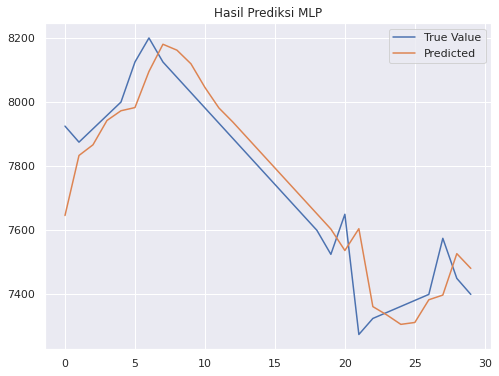

In [ ]:
from sklearn.neural_network import MLPRegressor

mlp = MLPRegressor(hidden_layer_sizes=(150,100,50),
                       max_iter = 300,activation = 'identity',
                       solver = 'lbfgs')
mlp.fit(X_train, y_train)
y_pred_mlp = mlp.predict(X_test)
y_pred_transform = scaler.inverse_transform([y_pred_mlp])[0]

print("MLP")
print("MAE: ",mean_absolute_error(y_test_transform,y_pred_transform))
print("MSE: ",mean_squared_error(y_test_transform,y_pred_transform))
print("RMSE: ", np.sqrt(mean_squared_error(y_test_transform,y_pred_transform)))
print("MAPE: ",mean_absolute_percentage_error(y_test_transform,y_pred_transform)*100)
print("R2: ",r2_score(y_test_transform,y_pred_transform))
print("")

plt.figure(figsize=(8,6))
plt.plot(y_test_transform, label='True Value')
plt.plot(y_pred_transform,label='Predicted')
plt.legend()
plt.title('Hasil Prediksi MLP')

In [ ]:
y_pred_transform

array([7646.12506012, 7833.40936483, 7866.70563283, 7942.61431709,
       7972.9273983 , 7982.86148054, 8095.45720459, 8180.3706151 ,
       8161.94721531, 8119.46170939, 8045.67017872, 7981.57846749,
       7937.50175948, 7889.8403974 , 7842.17903533, 7794.51767326,
       7746.85631118, 7699.19494911, 7651.53358704, 7603.87222496,
       7536.92200469, 7604.96664306, 7361.9571616 , 7335.87326194,
       7306.54990455, 7312.45711838, 7383.27773719, 7397.8944276 ,
       7527.12761756, 7481.17526813])

In [ ]:
df_pred_class_bca.head()

,Date,y_true,label_true,prctg_true,bca_prophet,label_fb_prophet,prctg_prophet
0,2022-04-21,7925.000000,NaN,NaN,7677.183646,NaN,NaN
1,2022-04-22,7875.000000,Turun,0.63,7674.262596,Turun,0.04
2,2022-04-23,7916.666667,Naik,0.53,7670.166780,Turun,0.05
3,2022-04-24,7958.333333,Naik,0.53,7666.079240,Turun,0.05
4,2022-04-25,8000.000000,Naik,0.52,7663.137602,Turun,0.04


In [ ]:
df_pred_class_bca['bca_mlp'] = y_pred_transform

label = []
prctg = []
for idx,data in enumerate(df_pred_class_bca['bca_mlp']):
    if idx != (len(df_pred_class_bca)-1):
        prctg_value = round((abs(df_pred_class_bca['bca_mlp'][idx+1] - data)/data)*100, ndigits=2)
        prctg.append(prctg_value)
        if data < df_pred_class_bca['bca_mlp'][idx+1]:
            label.append('Naik')
        elif data > df_pred_class_bca['bca_mlp'][idx+1]:
            label.append('Turun')
        else:
            label.append('Tetap')

df_pred_class_bca['label_mlp'] = np.NaN
df_pred_class_bca['label_mlp'][1:] = label

df_pred_class_bca['prctg_mlp'] = np.NaN
df_pred_class_bca['prctg_mlp'][1:] = prctg

df_pred_class_bca

,Date,y_true,label_true,prctg_true,bca_prophet,label_fb_prophet,prctg_prophet,bca_mlp,label_mlp,prctg_mlp
0,2022-04-21,7925.000000,NaN,NaN,7677.183646,NaN,NaN,7646.125060,NaN,NaN
1,2022-04-22,7875.000000,Turun,0.63,7674.262596,Turun,0.04,7833.409365,Naik,2.45
2,2022-04-23,7916.666667,Naik,0.53,7670.166780,Turun,0.05,7866.705633,Naik,0.43
3,2022-04-24,7958.333333,Naik,0.53,7666.079240,Turun,0.05,7942.614317,Naik,0.96
4,2022-04-25,8000.000000,Naik,0.52,7663.137602,Turun,0.04,7972.927398,Naik,0.38
5,2022-04-26,8125.000000,Naik,1.56,7664.309518,Naik,0.02,7982.861481,Naik,0.12
6,2022-04-27,8200.000000,Naik,0.92,7666.872501,Naik,0.03,8095.457205,Naik,1.41
7,2022-04-28,8125.000000,Turun,0.91,7664.002371,Turun,0.04,8180.370615,Naik,1.05
8,2022-04-29,8077.272727,Turun,0.59,7660.061780,Turun,0.05,8161.947215,Turun,0.23
9,2022-04-30,8029.545455,Turun,0.59,7654.534529,Turun,0.07,8119.461709,Turun,0.52


## Linear Regression

MLP
MAE:  76.64802056453318
MSE:  11714.841548549855
RMSE:  108.23512160361744
MAPE:  0.9963351793692942
R2:  0.8456685532077858



Text(0.5, 1.0, 'Hasil Prediksi LR')

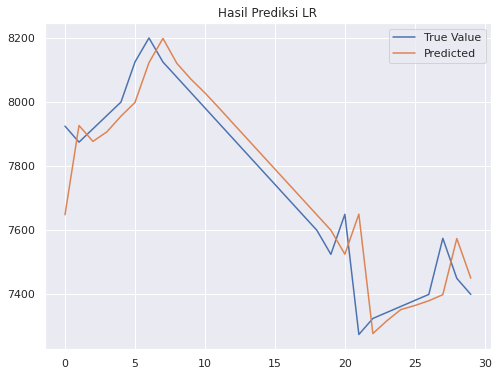

In [ ]:
from sklearn.linear_model import LinearRegression

LR = LinearRegression()
LR.fit(X_train, y_train)
y_pred_lr = LR.predict(X_test)
y_pred_lr_transform = scaler.inverse_transform([y_pred_lr])[0]

print("MLP")
print("MAE: ",mean_absolute_error(y_test_transform,y_pred_lr_transform))
print("MSE: ",mean_squared_error(y_test_transform,y_pred_lr_transform))
print("RMSE: ", np.sqrt(mean_squared_error(y_test_transform,y_pred_lr_transform)))
print("MAPE: ",mean_absolute_percentage_error(y_test_transform,y_pred_lr_transform)*100)
print("R2: ",r2_score(y_test_transform,y_pred_lr_transform))
print("")

plt.figure(figsize=(8,6))
plt.plot(y_test_transform, label='True Value')
plt.plot(y_pred_lr_transform,label='Predicted')
plt.legend()
plt.title('Hasil Prediksi LR')

In [ ]:
df_pred_class_bca['bca_lr'] = y_pred_lr_transform

# df_pred_class_bca.reset_index(drop=True, inplace=True)

# Labelling Data hasil prediksi

label = []
prctg = []
for idx,data in enumerate(df_pred_class_bca['bca_lr']):
    if idx != (len(df_pred_class_bca)-1):
        prctg_value = round((abs(df_pred_class_bca['bca_lr'][idx+1] - data)/data)*100, ndigits=2)
        prctg.append(prctg_value)
        if data < df_pred_class_bca['bca_lr'][idx+1]:
            label.append('Naik')
        elif data > df_pred_class_bca['bca_lr'][idx+1]:
            label.append('Turun')
        else:
            label.append('Tetap')

df_pred_class_bca['label_lr'] = np.NaN
df_pred_class_bca['label_lr'][1:] = label

df_pred_class_bca['prctg_lr'] = np.NaN
df_pred_class_bca['prctg_lr'][1:] = prctg
df_pred_class_bca

,Date,y_true,label_true,prctg_true,bca_prophet,label_fb_prophet,prctg_prophet,bca_mlp,label_mlp,prctg_mlp,bca_lr,label_lr,prctg_lr
0,2022-04-21,7925.000000,NaN,NaN,7677.183646,NaN,NaN,7646.125060,NaN,NaN,7648.382280,NaN,NaN
1,2022-04-22,7875.000000,Turun,0.63,7674.262596,Turun,0.04,7833.409365,Naik,2.45,7926.849740,Naik,3.64
2,2022-04-23,7916.666667,Naik,0.53,7670.166780,Turun,0.05,7866.705633,Naik,0.43,7877.388785,Turun,0.62
3,2022-04-24,7958.333333,Naik,0.53,7666.079240,Turun,0.05,7942.614317,Naik,0.96,7907.417580,Naik,0.38
4,2022-04-25,8000.000000,Naik,0.52,7663.137602,Turun,0.04,7972.927398,Naik,0.38,7956.028169,Naik,0.61
5,2022-04-26,8125.000000,Naik,1.56,7664.309518,Naik,0.02,7982.861481,Naik,0.12,7998.806537,Naik,0.54
6,2022-04-27,8200.000000,Naik,0.92,7666.872501,Naik,0.03,8095.457205,Naik,1.41,8122.814217,Naik,1.55
7,2022-04-28,8125.000000,Turun,0.91,7664.002371,Turun,0.04,8180.370615,Naik,1.05,8198.614441,Naik,0.93
8,2022-04-29,8077.272727,Turun,0.59,7660.061780,Turun,0.05,8161.947215,Turun,0.23,8120.505711,Turun,0.95
9,2022-04-30,8029.545455,Turun,0.59,7654.534529,Turun,0.07,8119.461709,Turun,0.52,8071.452353,Turun,0.60


mana yang worst case ?
- sebenarnya tetap diprediksi naik
- sebenarnya tetap diprediksi turun
- sebenarnya turun diprediksi tetap
- sebenarnya naik diprediksi tetap 

## Prediksi senin 23 Mei 2022

## LSTM

In [ ]:
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import Flatten
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [ ]:
trainX = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
testX = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

In [ ]:
trainX.shape

(1930, 1, 5)

In [ ]:
model = Sequential()
model.add(LSTM(96,return_sequences = True, input_shape=(1, 5)))
model.add(Dropout(0.2))
model.add(LSTM(96,return_sequences = True))
model.add(Dropout(0.2))
model.add(LSTM(96,return_sequences = True))
model.add(Dropout(0.2))
model.add(LSTM(96,return_sequences = True))
model.add(Flatten())
model.add(Dropout(0.2))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adamax')
print(model.summary())

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_8 (LSTM)               (None, 1, 96)             39168     
                                                                 
 dropout_8 (Dropout)         (None, 1, 96)             0         
                                                                 
 lstm_9 (LSTM)               (None, 1, 96)             74112     
                                                                 
 dropout_9 (Dropout)         (None, 1, 96)             0         
                                                                 
 lstm_10 (LSTM)              (None, 1, 96)             74112     
                                                                 
 dropout_10 (Dropout)        (None, 1, 96)             0         
                                                                 
 lstm_11 (LSTM)              (None, 1, 96)            

In [ ]:
50 epochs

In [ ]:
history = model.fit(trainX, y_train, epochs=50, batch_size=8, verbose=2)

Epoch 1/50
242/242 - 11s - loss: 0.0463 - 11s/epoch - 43ms/step
Epoch 2/50
242/242 - 2s - loss: 0.0051 - 2s/epoch - 7ms/step
Epoch 3/50
242/242 - 3s - loss: 0.0040 - 3s/epoch - 10ms/step
Epoch 4/50
242/242 - 3s - loss: 0.0032 - 3s/epoch - 12ms/step
Epoch 5/50
242/242 - 3s - loss: 0.0029 - 3s/epoch - 11ms/step
Epoch 6/50
242/242 - 2s - loss: 0.0026 - 2s/epoch - 7ms/step
Epoch 7/50
242/242 - 2s - loss: 0.0025 - 2s/epoch - 7ms/step
Epoch 8/50
242/242 - 2s - loss: 0.0022 - 2s/epoch - 7ms/step
Epoch 9/50
242/242 - 2s - loss: 0.0022 - 2s/epoch - 7ms/step
Epoch 10/50
242/242 - 2s - loss: 0.0021 - 2s/epoch - 7ms/step
Epoch 11/50
242/242 - 2s - loss: 0.0018 - 2s/epoch - 7ms/step
Epoch 12/50
242/242 - 2s - loss: 0.0019 - 2s/epoch - 7ms/step
Epoch 13/50
242/242 - 2s - loss: 0.0018 - 2s/epoch - 7ms/step
Epoch 14/50
242/242 - 2s - loss: 0.0016 - 2s/epoch - 7ms/step
Epoch 15/50
242/242 - 2s - loss: 0.0017 - 2s/epoch - 7ms/step
Epoch 16/50
242/242 - 2s - loss: 0.0015 - 2s/epoch - 7ms/step
Epoch 17/50

LSTM
MAE:  92.91305486505676
MSE:  14810.270507846768
RMSE:  121.69745481252583
MAPE:  1.2026802497461095
R2:  0.804889339272114



Text(0.5, 1.0, 'Hasil Prediksi LSTM')

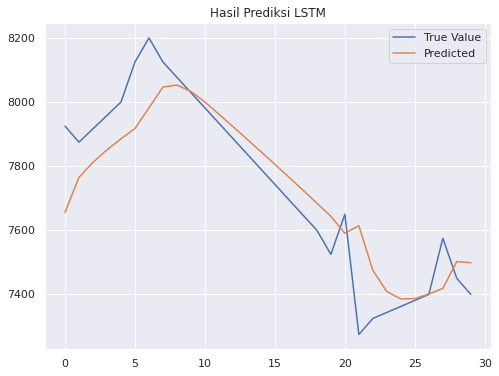

In [ ]:
y_pred_lstm = model.predict(testX)
y_pred_lstm_transform = scaler.inverse_transform(y_pred_lstm)

print("LSTM")
print("MAE: ",mean_absolute_error(y_test_transform,y_pred_lstm_transform))
print("MSE: ",mean_squared_error(y_test_transform,y_pred_lstm_transform))
print("RMSE: ", np.sqrt(mean_squared_error(y_test_transform,y_pred_lstm_transform)))
print("MAPE: ",mean_absolute_percentage_error(y_test_transform,y_pred_lstm_transform)*100)
print("R2: ",r2_score(y_test_transform,y_pred_lstm_transform))
print("")

plt.figure(figsize=(8,6))
plt.plot(y_test_transform, label='True Value')
plt.plot(y_pred_lstm_transform,label='Predicted')
plt.legend()
plt.title('Hasil Prediksi LSTM')

In [ ]:
df_pred_class_bca['bca_lstm'] = y_pred_lstm_transform

# df_pred_class.reset_index(drop=True, inplace=True)

# Labelling Data hasil prediksi

label = []
prctg = []

for idx,data in enumerate(df_pred_class_bca['bca_lstm']):
    if idx != (len(df_pred_class_bca)-1):
        prctg_value = round((abs(df_pred_class_bca['bca_lstm'][idx+1] - data)/data)*100, ndigits=2)
        prctg.append(prctg_value)
        if data < df_pred_class_bca['bca_lstm'][idx+1]:
            label.append('Naik')
        elif data > df_pred_class_bca['bca_lstm'][idx+1]:
            label.append('Turun')
        else:
            label.append('Tetap')

df_pred_class_bca['label_lstm'] = np.NaN
df_pred_class_bca['label_lstm'][1:] = label

df_pred_class_bca['prctg_lstm'] = np.NaN
df_pred_class_bca['prctg_lstm'][1:] = prctg
df_pred_class_bca

,Date,y_true,label_true,prctg_true,bca_prophet,label_fb_prophet,prctg_prophet,bca_mlp,label_mlp,prctg_mlp,bca_lr,label_lr,prctg_lr,bca_lstm,label_lstm,prctg_lstm
0,2022-04-21,7925.000000,NaN,NaN,7677.183646,NaN,NaN,7646.125060,NaN,NaN,7648.382280,NaN,NaN,7655.782715,NaN,NaN
1,2022-04-22,7875.000000,Turun,0.63,7674.262596,Turun,0.04,7833.409365,Naik,2.45,7926.849740,Naik,3.64,7764.958496,Naik,1.43
2,2022-04-23,7916.666667,Naik,0.53,7670.166780,Turun,0.05,7866.705633,Naik,0.43,7877.388785,Turun,0.62,7812.332031,Naik,0.61
3,2022-04-24,7958.333333,Naik,0.53,7666.079240,Turun,0.05,7942.614317,Naik,0.96,7907.417580,Naik,0.38,7850.887695,Naik,0.49
4,2022-04-25,8000.000000,Naik,0.52,7663.137602,Turun,0.04,7972.927398,Naik,0.38,7956.028169,Naik,0.61,7885.250000,Naik,0.44
5,2022-04-26,8125.000000,Naik,1.56,7664.309518,Naik,0.02,7982.861481,Naik,0.12,7998.806537,Naik,0.54,7917.528809,Naik,0.41
6,2022-04-27,8200.000000,Naik,0.92,7666.872501,Naik,0.03,8095.457205,Naik,1.41,8122.814217,Naik,1.55,7981.903320,Naik,0.81
7,2022-04-28,8125.000000,Turun,0.91,7664.002371,Turun,0.04,8180.370615,Naik,1.05,8198.614441,Naik,0.93,8046.759277,Naik,0.81
8,2022-04-29,8077.272727,Turun,0.59,7660.061780,Turun,0.05,8161.947215,Turun,0.23,8120.505711,Turun,0.95,8053.154297,Naik,0.08
9,2022-04-30,8029.545455,Turun,0.59,7654.534529,Turun,0.07,8119.461709,Turun,0.52,8071.452353,Turun,0.60,8033.143555,Turun,0.25


In [ ]:
df_pred_class_bca.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Date              30 non-null     datetime64[ns]
 1   y_true            30 non-null     float64       
 2   label_true        29 non-null     object        
 3   prctg_true        29 non-null     float64       
 4   bca_prophet       30 non-null     float64       
 5   label_fb_prophet  29 non-null     object        
 6   prctg_prophet     29 non-null     float64       
 7   bca_mlp           30 non-null     float64       
 8   label_mlp         29 non-null     object        
 9   prctg_mlp         29 non-null     float64       
 10  bca_lr            30 non-null     float64       
 11  label_lr          29 non-null     object        
 12  prctg_lr          29 non-null     float64       
 13  bca_lstm          30 non-null     float32       
 14  label_lstm        29 non-nul

In [ ]:
df_pred_class_bca.to_csv('BBCA_RESULT.CSV', index=False)

In [ ]:
# EVALUASI PREDIKSI MOVEMENT

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, recall_score, precision_score, f1_score
pred_columns = ['label_fb_prophet','label_mlp','label_lr','label_lstm']

for column in pred_columns:
  # print('#'*20)
  print('#'*20, column ,'#'*20)
  print(accuracy_score(df_pred_class_bca[column][1:], df_pred_class_bca['label_true'][1:]))
  print(confusion_matrix(df_pred_class_bca[column][1:], df_pred_class_bca['label_true'][1:]))
  print(classification_report(df_pred_class_bca[column][1:], df_pred_class_bca['label_true'][1:]))
  print()

#################### label_fb_prophet ####################
0.7241379310344828
[[ 4  0]
 [ 8 17]]
              precision    recall  f1-score   support

        Naik       0.33      1.00      0.50         4
       Turun       1.00      0.68      0.81        25

    accuracy                           0.72        29
   macro avg       0.67      0.84      0.65        29
weighted avg       0.91      0.72      0.77        29


#################### label_mlp ####################
0.7241379310344828
[[ 8  4]
 [ 4 13]]
              precision    recall  f1-score   support

        Naik       0.67      0.67      0.67        12
       Turun       0.76      0.76      0.76        17

    accuracy                           0.72        29
   macro avg       0.72      0.72      0.72        29
weighted avg       0.72      0.72      0.72        29


#################### label_lr ####################
0.7586206896551724
[[ 9  4]
 [ 3 13]]
              precision    recall  f1-score   support

        Naik 

In [ ]:
model_name = [] # model
acs = [] # accuracy
rcs = [] # reccall
pcs = [] # precision
f1s = [] # f1score

for column in pred_columns:
  # df_movement_evaluation['Model']
  model_name.append(column)
  acc = accuracy_score(df_pred_class_bca[column][1:], df_pred_class_bca['label_true'][1:])
  recall = recall_score(df_pred_class_bca[column][1:], df_pred_class_bca['label_true'][1:], average='weighted')
  precision = precision_score(df_pred_class_bca[column][1:], df_pred_class_bca['label_true'][1:],average='weighted')
  f1 = f1_score(df_pred_class_bca[column][1:], df_pred_class_bca['label_true'][1:],average='weighted')
  acs.append(acc)
  rcs.append(recall)
  pcs.append(precision)
  f1s.append(f1)

df_movement_evaluation = pd.DataFrame({
    'Model' : model_name,
    'Accuracy' : acs,
    'Recall' : rcs,
    'Precision' : pcs,
    'F1_Score' : f1s
})
df_movement_evaluation.sort_values('Accuracy',ascending=False)

,Model,Accuracy,Recall,Precision,F1_Score
2,label_lr,0.758621,0.758621,0.758114,0.757450
0,label_fb_prophet,0.724138,0.724138,0.908046,0.766831
1,label_mlp,0.724138,0.724138,0.724138,0.724138
3,label_lstm,0.689655,0.689655,0.688303,0.688150


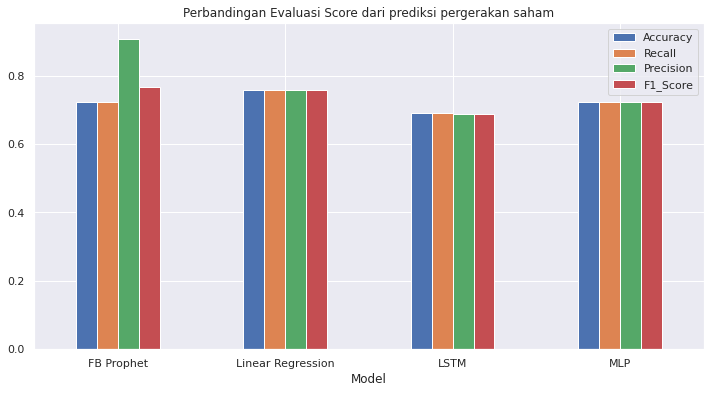

In [ ]:
df_movement_evaluation.groupby('Model')['Accuracy',	'Recall',	'Precision',	'F1_Score'].sum().plot(kind='bar',figsize=(12,6))
plt.xticks([0,1,2,3], rotation=0, labels=['FB Prophet','Linear Regression','LSTM','MLP'])
plt.title('Perbandingan Evaluasi Score dari prediksi pergerakan saham')
plt.show()

# MDKA

In [ ]:
df_mdka = pd.read_csv('/content/MDKA.JK.csv')
df_mdka['Date'] = pd.to_datetime(df_mdka['Date'])
df_mdka

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-01-02,383.673553,383.673553,383.673553,383.673553,383.673553,0.0
1,2017-01-03,383.673553,383.673553,383.673553,383.673553,383.673553,2085.0
2,2017-01-04,383.673553,383.673553,381.755157,381.755157,381.755157,12510.0
3,2017-01-05,381.755157,381.755157,381.755157,381.755157,381.755157,5734.0
4,2017-01-06,381.755157,381.755157,381.755157,381.755157,381.755157,521.0
...,...,...,...,...,...,...,...
1346,2022-05-13,4560.000000,4570.000000,4280.000000,4380.000000,4380.000000,107786800.0
1347,2022-05-17,4440.000000,4600.000000,4350.000000,4480.000000,4480.000000,87255600.0
1348,2022-05-18,4550.000000,4990.000000,4530.000000,4750.000000,4750.000000,149249600.0
1349,2022-05-19,4720.000000,5175.000000,4620.000000,4980.000000,4980.000000,140331300.0


In [ ]:
new_df_mdka = df_mdka.merge(df_date, on=['Date'], how='right')
new_df_mdka

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-01-01,NaN,NaN,NaN,NaN,NaN,NaN
1,2017-01-02,383.673553,383.673553,383.673553,383.673553,383.673553,0.0
2,2017-01-03,383.673553,383.673553,383.673553,383.673553,383.673553,2085.0
3,2017-01-04,383.673553,383.673553,381.755157,381.755157,381.755157,12510.0
4,2017-01-05,381.755157,381.755157,381.755157,381.755157,381.755157,5734.0
...,...,...,...,...,...,...,...
1961,2022-05-16,NaN,NaN,NaN,NaN,NaN,NaN
1962,2022-05-17,4440.000000,4600.000000,4350.000000,4480.000000,4480.000000,87255600.0
1963,2022-05-18,4550.000000,4990.000000,4530.000000,4750.000000,4750.000000,149249600.0
1964,2022-05-19,4720.000000,5175.000000,4620.000000,4980.000000,4980.000000,140331300.0


In [ ]:
mdka_full = new_df_mdka[['Date','Close']]
mdka_full['Close'] = mdka_full['Close'].interpolate(method='linear',limit_direction ='forward')
mdka_full = mdka_full[1:].reset_index(drop=True)
mdka_full

,Date,Close
0,2017-01-02,383.673553
1,2017-01-03,383.673553
2,2017-01-04,381.755157
3,2017-01-05,381.755157
4,2017-01-06,381.755157
...,...,...
1960,2022-05-16,4455.000000
1961,2022-05-17,4480.000000
1962,2022-05-18,4750.000000
1963,2022-05-19,4980.000000


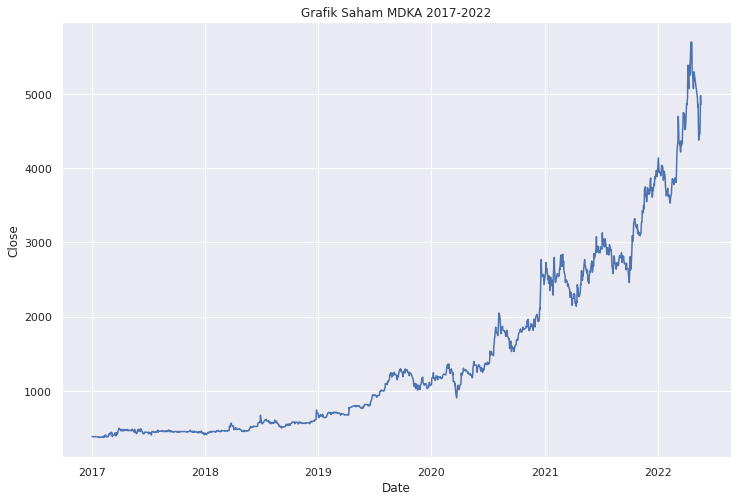

In [ ]:
plt.figure(figsize=(12,8))
sns.lineplot(data=mdka_full, x='Date',y='Close')
plt.title('Grafik Saham MDKA 2017-2022')
sns.set_theme()

In [ ]:
df_pred_mdka = pd.DataFrame({
    'ds' : mdka_full['Date'],
    'y' : mdka_full['Close']
})
df_pred_mdka

,ds,y
0,2017-01-02,383.673553
1,2017-01-03,383.673553
2,2017-01-04,381.755157
3,2017-01-05,381.755157
4,2017-01-06,381.755157
...,...,...
1960,2022-05-16,4455.000000
1961,2022-05-17,4480.000000
1962,2022-05-18,4750.000000
1963,2022-05-19,4980.000000


##EWM

In [ ]:
df_pred['y'][-10:]

1955    7650.00
1956    7275.00
1957    7325.00
1958    7343.75
1959    7362.50
1960    7381.25
1961    7400.00
1962    7575.00
1963    7450.00
1964    7400.00
Name: y, dtype: float64

In [ ]:
np.sqrt(mean_squared_error(df_pred['y'][-10:].ewm(span=5, adjust=True).mean(),df_pred['y'][-10:]))

65.84383339452978

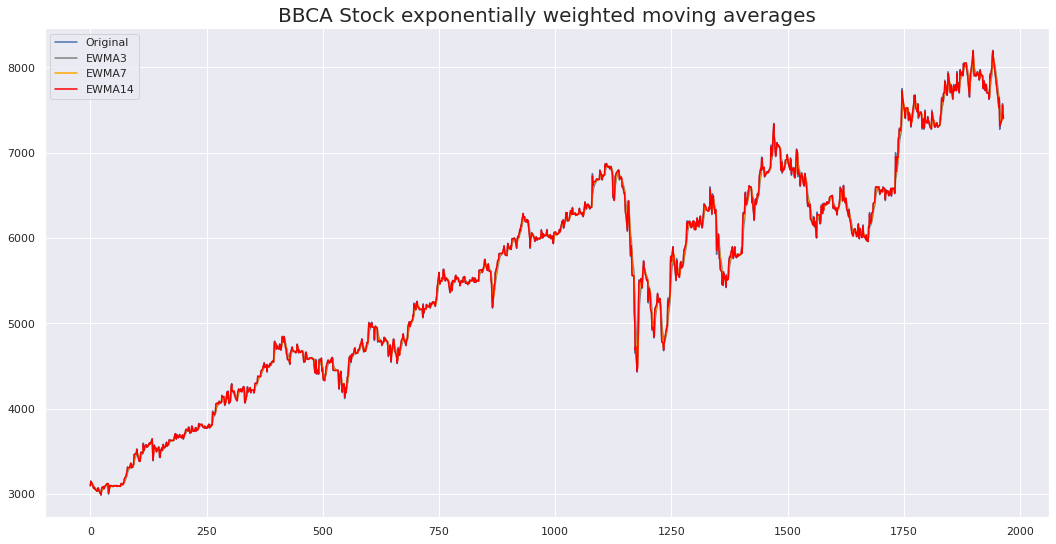

In [ ]:
df_pred['EWMA3'] = df_pred['y'].ewm( alpha=0.3, adjust=False).mean()
df_pred['EWMA7'] = df_pred['y'].ewm( alpha=0.5, adjust=False).mean()
df_pred['EWMA14'] = df_pred['y'].ewm( alpha=0.9, adjust=False).mean()

# Plot
plt.figure(figsize=(18,9))
plt.title('BBCA Stock exponentially weighted moving averages', size=20)
plt.plot(df_pred['y'], label='Original')
plt.plot(df_pred['EWMA3'], color='gray', label='EWMA3')
plt.plot(df_pred['EWMA7'], color='orange', label='EWMA7')
plt.plot(df_pred['EWMA14'], color='red', label='EWMA14')
plt.legend();

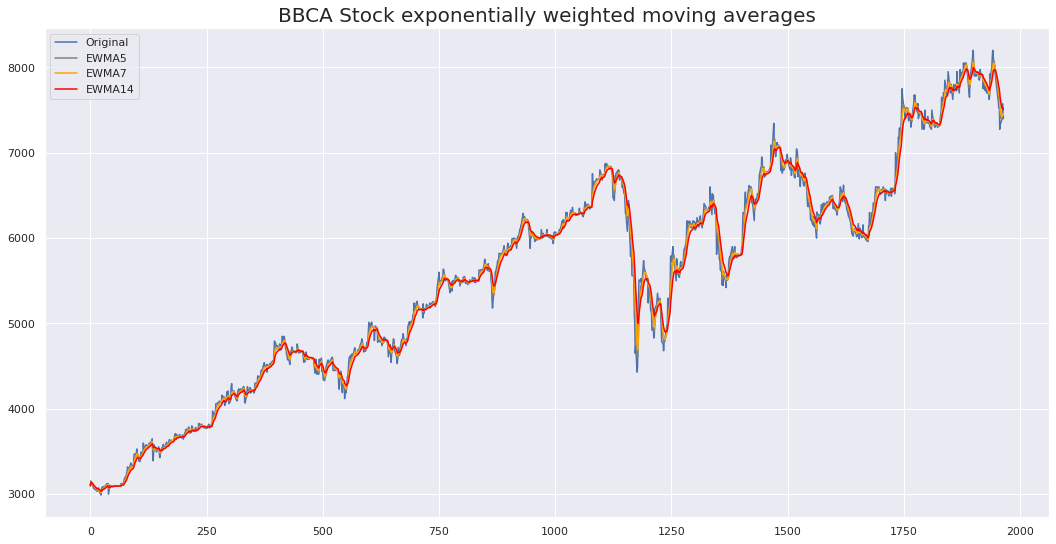

In [ ]:
df_pred['EWMA5'] = df_pred['y'].ewm(span=5, adjust=True).mean()
df_pred['EWMA7'] = df_pred['y'].ewm(span=7, adjust=True).mean()
df_pred['EWMA14'] = df_pred['y'].ewm(span=14, adjust=True).mean()

# Plot
plt.figure(figsize=(18,9))
plt.title('BBCA Stock exponentially weighted moving averages', size=20)
plt.plot(df_pred['y'], label='Original')
plt.plot(df_pred['EWMA5'], color='gray', label='EWMA5')
plt.plot(df_pred['EWMA7'], color='orange', label='EWMA7')
plt.plot(df_pred['EWMA14'], color='red', label='EWMA14')
plt.legend();

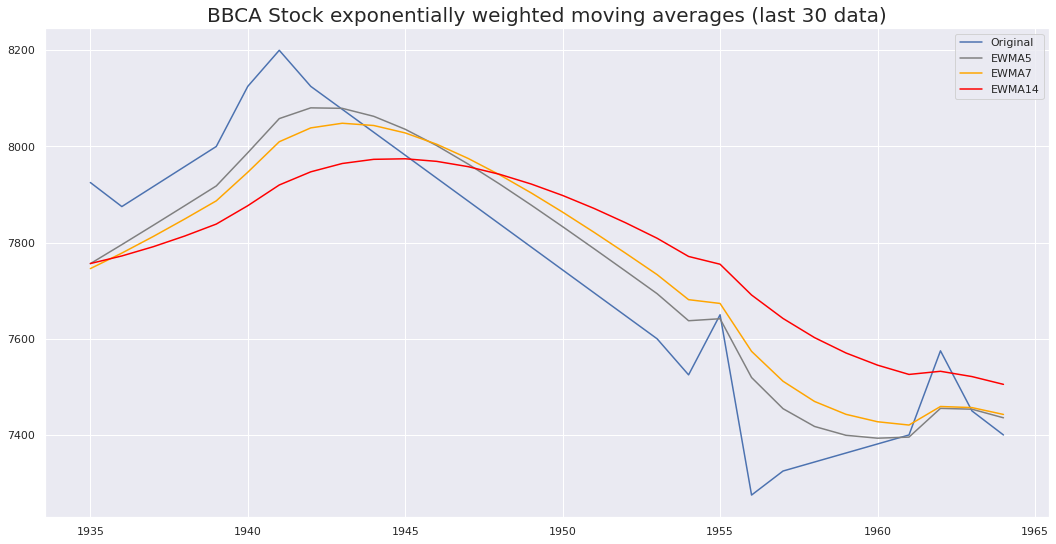

In [ ]:
plt.figure(figsize=(18,9))
plt.title('BBCA Stock exponentially weighted moving averages (last 30 data)', size=20)
plt.plot(df_pred['y'][-30:], label='Original')
plt.plot(df_pred['EWMA5'][-30:], color='gray', label='EWMA5')
plt.plot(df_pred['EWMA7'][-30:], color='orange', label='EWMA7')
plt.plot(df_pred['EWMA14'][-30:], color='red', label='EWMA14')
plt.legend();

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
# import numpy as np j
print("exponentially weighted moving averages 5 lag")
print("MAE: ",mean_absolute_error(df_pred['y'],df_pred['EWMA5']))
print("MSE: ",mean_squared_error(df_pred['y'],df_pred['EWMA5']))
print("RMSE: ", np.sqrt(mean_squared_error(df_pred['y'],df_pred['EWMA5'])))
print("R2: ",r2_score(df_pred['y'],df_pred['EWMA5']))
print("")


print("exponentially weighted moving averages 7 lag")
print("MAE: ",mean_absolute_error(df_pred['y'],df_pred['EWMA7']))
print("MSE: ",mean_squared_error(df_pred['y'],df_pred['EWMA7']))
print("RMSE: ", np.sqrt(mean_squared_error(df_pred['y'],df_pred['EWMA7'])))
print("R2: ",r2_score(df_pred['y'],df_pred['EWMA7']))
print("")


print("exponentially weighted moving averages 14 lag")
print("MAE: ",mean_absolute_error(df_pred['y'],df_pred['EWMA14']))
print("MSE: ",mean_squared_error(df_pred['y'],df_pred['EWMA14']))
print("RMSE: ", np.sqrt(mean_squared_error(df_pred['y'],df_pred['EWMA14'])))
print("R2: ",r2_score(df_pred['y'],df_pred['EWMA14']))
print("")

exponentially weighted moving averages 5 lag
MAE:  37.901935232918
MSE:  3398.4281123975165
RMSE:  58.296038565219135
R2:  0.9979367139306504

exponentially weighted moving averages 7 lag
MAE:  48.35570098943137
MSE:  5484.359300948005
RMSE:  74.05646022426406
R2:  0.996670283504402

exponentially weighted moving averages 14 lag
MAE:  74.39041169833925
MSE:  12745.476675824852
RMSE:  112.89586651345944
R2:  0.9922618447109369



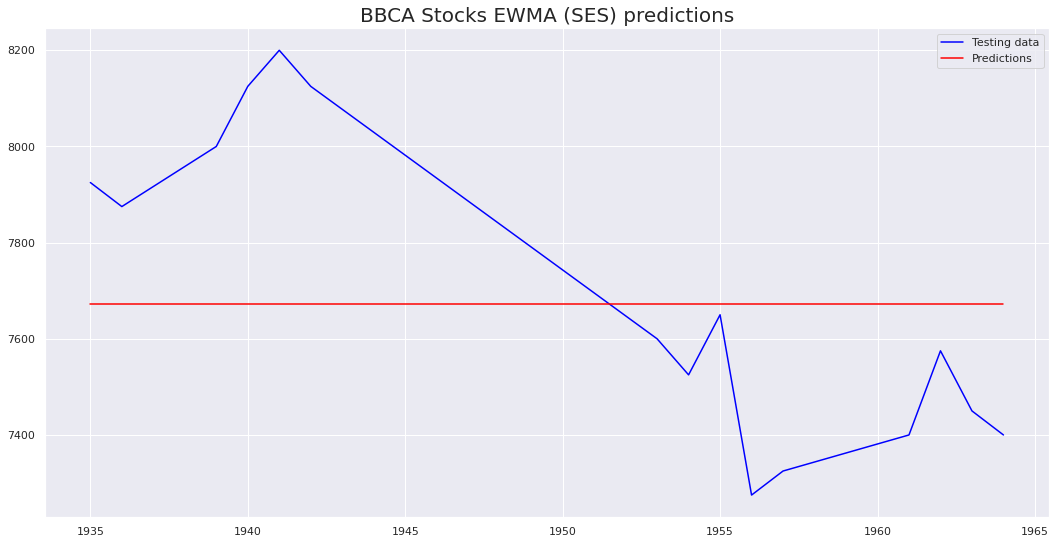

In [ ]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

# Model parameters
span = 5 
alpha = 2 / (span + 1)

# Train/test split
df_train = df_pred['y'][:-30]
df_test = df_pred['y'][-30:]

# Train the model
model = SimpleExpSmoothing(df_train)
results = model.fit(smoothing_level=alpha, optimized=False)
predictions = results.forecast(steps=30)

# Plot
plt.figure(figsize=(18,9))
plt.title('BBCA Stocks EWMA (SES) predictions', size=20)
plt.plot(df_test, color='blue', label='Testing data')
plt.plot(predictions, color='red', label='Predictions')
plt.legend();

In [ ]:
print("exponentially weighted moving averages 14 lag")
print("MAE: ",mean_absolute_error(df_pred['y'][-30:],predictions))
print("MSE: ",mean_squared_error(df_pred['y'][-30:],predictions))
print("RMSE: ", np.sqrt(mean_squared_error(df_pred['y'][-30:],predictions)))
print("R2: ",r2_score(df_pred['y'][-30:],predictions))
print("")

exponentially weighted moving averages 14 lag
MAE:  249.3097554269845
MSE:  79831.441608732
RMSE:  282.5445834000928
R2:  -0.05170025833673231



## FB Prophet

In [ ]:
train_proph_mdka = df_pred_mdka.iloc[:-30]
test_proph_mdka = df_pred_mdka.iloc[-30:]

In [ ]:
m = Prophet(weekly_seasonality=True, yearly_seasonality=True)
m.fit(train_proph_mdka)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
future = m.make_future_dataframe(360,include_history=False)

forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head()

,ds,yhat,yhat_lower,yhat_upper
0,2022-04-21,4582.484757,4417.224716,4761.862331
1,2022-04-22,4583.698033,4404.174738,4773.013187
2,2022-04-23,4581.691964,4384.734313,4759.522013
3,2022-04-24,4579.254901,4394.194662,4751.662319
4,2022-04-25,4576.647285,4399.197189,4764.452613


In [ ]:
test_proph_mdka.reset_index(inplace=True)

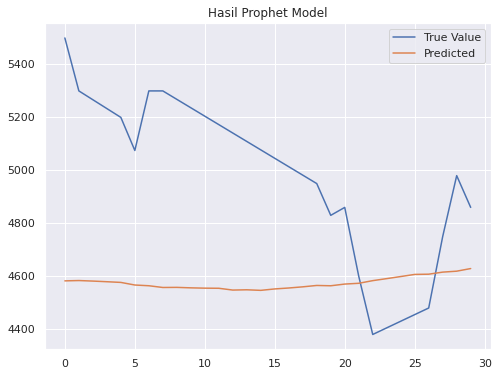

In [ ]:
plt.figure(figsize=(8,6))
test_proph_mdka['y'].plot(label='True Value')
forecast['yhat'][:30].plot(label='Predicted')
plt.title('Hasil Prophet Model')
plt.legend()

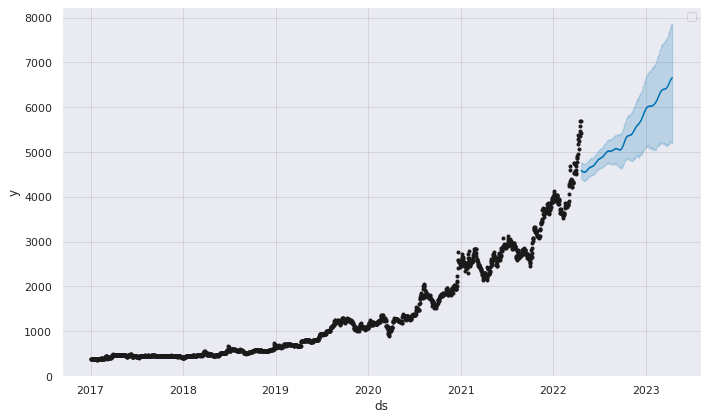

In [ ]:
# only future data

fig1 = m.plot(forecast)
plt.legend()

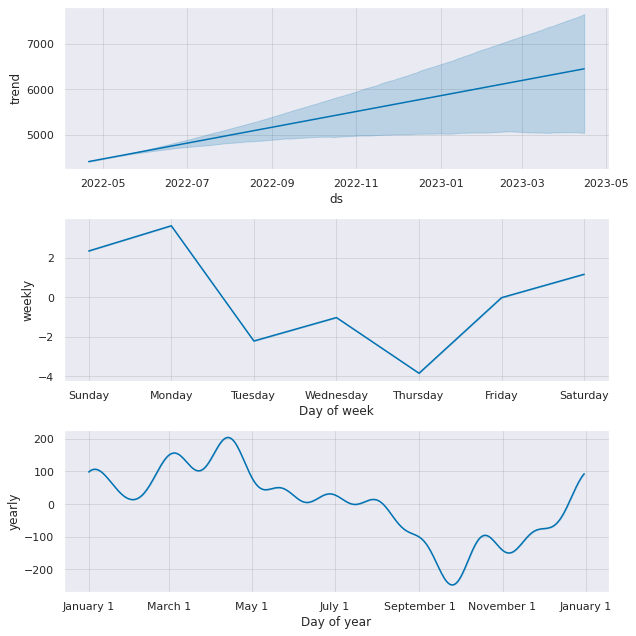

In [ ]:
fig2 = m.plot_components(forecast)

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
# import numpy as np j
print("Prophet Model")
print("MAE: ",mean_absolute_error(test_proph_mdka['y'],forecast['yhat'][:30]))
print("MSE: ",mean_squared_error(test_proph_mdka['y'],forecast['yhat'][:30]))
print("RMSE: ", np.sqrt(mean_squared_error(test_proph_mdka['y'],forecast['yhat'][:30])))
print("MAPE: ",mean_absolute_percentage_error(test_proph_mdka['y'],forecast['yhat'][:30])*100)
print("R2: ",r2_score(test_proph_mdka['y'],forecast['yhat'][:30]))
print("")

Prophet Model
MAE:  460.99630206793034
MSE:  266355.0278796797
RMSE:  516.09594832713
MAPE:  9.014368479906125
R2:  -1.8102426505997076



In [ ]:
# Labelling Data Aktual

df_pred_class_mdka = mdka_full[-30:].copy().rename(columns={'Close':'y_true'}).reset_index(drop=True)

# df_pred_class['y_true'] = test['y']

label = []
prctg = []
for idx,data in enumerate(df_pred_class_mdka['y_true']):
    if idx != (len(df_pred_class_mdka)-1):

        prctg_value = round((abs(df_pred_class_mdka['y_true'][idx+1] - data)/data)*100, ndigits=2)
        prctg.append(prctg_value)
        if data < df_pred_class_mdka['y_true'][idx+1]:
            label.append('Naik')
        elif data > df_pred_class_mdka['y_true'][idx+1]:
            label.append('Turun')
        else:
            label.append('Tetap')

df_pred_class_mdka['label_true'] = np.NaN
df_pred_class_mdka['label_true'][1:] = label

df_pred_class_mdka['prctg_true'] = np.NaN
df_pred_class_mdka['prctg_true'][1:] = prctg
df_pred_class_mdka

,Date,y_true,label_true,prctg_true
0,2022-04-21,5500.000000,NaN,NaN
1,2022-04-22,5300.000000,Turun,3.64
2,2022-04-23,5266.666667,Turun,0.63
3,2022-04-24,5233.333333,Turun,0.63
4,2022-04-25,5200.000000,Turun,0.64
5,2022-04-26,5075.000000,Turun,2.40
6,2022-04-27,5300.000000,Naik,4.43
7,2022-04-28,5300.000000,Tetap,0.00
8,2022-04-29,5268.181818,Turun,0.60
9,2022-04-30,5236.363636,Turun,0.60


In [ ]:
# DATAFRAME UNTUK MELIHAT PERGERAKAN HARGA SAHAM (NAIK/TURUN/TETAP)

df_pred_class_mdka['mdka_prophet'] = forecast['yhat'][:30]

# df_pred_class_mdka.reset_index(drop=True, inplace=True)

# Labelling Data hasil prediksi

label = []
prctg = []
for idx,data in enumerate(df_pred_class_mdka['mdka_prophet']):
    if idx != (len(df_pred_class_mdka)-1):
        prctg_value = round((abs(df_pred_class_mdka['mdka_prophet'][idx+1] - data)/data)*100, ndigits=2)
        prctg.append(prctg_value)
        if data < df_pred_class_mdka['mdka_prophet'][idx+1]:
            label.append('Naik')
        elif data > df_pred_class_mdka['mdka_prophet'][idx+1]:
            label.append('Turun')
        else:
            label.append('Tetap')

df_pred_class_mdka['label_fb_prophet'] = np.NaN
df_pred_class_mdka['label_fb_prophet'][1:] = label

df_pred_class_mdka['prctg_prophet'] = np.NaN
df_pred_class_mdka['prctg_prophet'][1:] = prctg
df_pred_class_mdka

,Date,y_true,label_true,prctg_true,mdka_prophet,label_fb_prophet,prctg_prophet
0,2022-04-21,5500.000000,NaN,NaN,4582.484757,NaN,NaN
1,2022-04-22,5300.000000,Turun,3.64,4583.698033,Naik,0.03
2,2022-04-23,5266.666667,Turun,0.63,4581.691964,Turun,0.04
3,2022-04-24,5233.333333,Turun,0.63,4579.254901,Turun,0.05
4,2022-04-25,5200.000000,Turun,0.64,4576.647285,Turun,0.06
5,2022-04-26,5075.000000,Turun,2.40,4566.826608,Turun,0.21
6,2022-04-27,5300.000000,Naik,4.43,4564.063877,Turun,0.06
7,2022-04-28,5300.000000,Tetap,0.00,4557.494831,Turun,0.14
8,2022-04-29,5268.181818,Turun,0.60,4557.901853,Naik,0.01
9,2022-04-30,5236.363636,Turun,0.60,4556.132447,Turun,0.04


## MLP

In [ ]:
def LaggedFeatures(s,lag=2,fillna=True, dropna=False):
    if type(s) is pd.DataFrame:
        new_dict={}
        for col_name in s:
            new_dict[col_name]=s[col_name]
            # create lagged Series
            for l in range(1,lag+1):
                new_dict['%s_lag%d' %(col_name,l)]=s[col_name].shift(l)
        res=pd.DataFrame(new_dict,index=s.index)

    elif type(s) is pd.Series:
        the_range=range(lag+1)
        res=pd.concat([s.shift(i) for i in the_range],axis=1)
        res.columns=['lag_%d' %i for i in the_range]
    else:
        print ('Only works for DataFrame or Series')
        return None
    if dropna:
        res = res.dropna()
    else:
        res = res
    if fillna:
        return res.fillna(0)
    else:
        return res 

In [ ]:
df_ml = mdka_full[['Close']]
df_ml.tail()

,Close
1960,4455.0
1961,4480.0
1962,4750.0
1963,4980.0
1964,4860.0


In [ ]:
# Train Test Sebelum di Normalisasi

train_data = df_ml.iloc[:-30]
test_data = df_ml.iloc[-30:]

**Untuk normalisasi data**

- Data frame dibagi train,test terlebih dahulu
- kemudian data train di scaling
- kemudian scaler di transform ke train dan test
- setelah di transform , train dan test digabung kembali
- baru kemudian di hitung lag datanya
- kemudian di bagi lagi menjadi train dan test

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, MaxAbsScaler, QuantileTransformer
scaler = MinMaxScaler()
# y = np.array(df_encode['Balance']).reshape(-1,1)
columns = list(train_data.columns)
scaler.fit(train_data[columns])

train_scaled = scaler.transform(train_data)
test_scaled = scaler.transform(test_data)

train_data[columns] = train_scaled
test_data[columns] = test_scaled

In [ ]:
df_ml_scaled = train_data.append(test_data)

In [ ]:
lag_df = LaggedFeatures(df_ml_scaled, lag=5, fillna=True, dropna=True)
lag_df.tail()

,Close,Close_lag1,Close_lag2,Close_lag3,Close_lag4,Close_lag5
1960,0.766406,0.761715,0.757024,0.752334,0.793612,0.842394
1961,0.771096,0.766406,0.761715,0.757024,0.752334,0.793612
1962,0.821755,0.771096,0.766406,0.761715,0.757024,0.752334
1963,0.864909,0.821755,0.771096,0.766406,0.761715,0.757024
1964,0.842394,0.864909,0.821755,0.771096,0.766406,0.761715


In [ ]:
train = lag_df.iloc[:-30]
test = lag_df.iloc[-30:]

In [ ]:
X_train = train.drop("Close", axis=1)
X_test = test.drop("Close", axis=1)

y_train = train["Close"]
y_test = test["Close"]

X_train = X_train.astype(float).values
y_train = y_train.astype(float).values

X_test = X_test.astype(float).values
y_test = y_test.astype(float).values

In [ ]:
y_test_transform = scaler.inverse_transform([y_test])[0]
y_test_transform

array([5500.        , 5300.        , 5266.66666667, 5233.33333333,
       5200.        , 5075.        , 5300.        , 5300.        ,
       5268.18181818, 5236.36363636, 5204.54545455, 5172.72727273,
       5140.90909091, 5109.09090909, 5077.27272727, 5045.45454545,
       5013.63636364, 4981.81818182, 4950.        , 4830.        ,
       4860.        , 4600.        , 4380.        , 4405.        ,
       4430.        , 4455.        , 4480.        , 4750.        ,
       4980.        , 4860.        ])

MLP
MAE:  105.78154879154508
MSE:  19433.83727182948
RMSE:  139.40529857874657
MAPE:  2.1511375106244737
R2:  0.7949586354691224



Text(0.5, 1.0, 'Hasil Prediksi MLP')

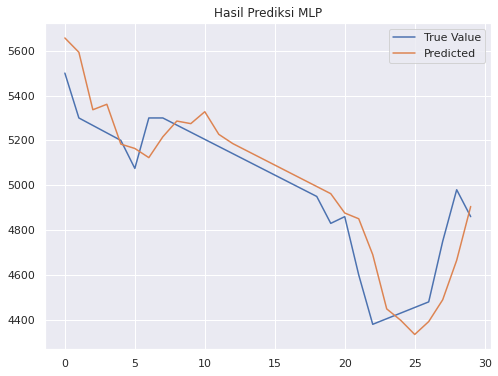

In [ ]:
from sklearn.neural_network import MLPRegressor

mlp = MLPRegressor(hidden_layer_sizes=(150,100,50),
                       max_iter = 300,activation = 'identity',
                       solver = 'lbfgs')
mlp.fit(X_train, y_train)
y_pred_mlp = mlp.predict(X_test)
y_pred_transform = scaler.inverse_transform([y_pred_mlp])[0]

print("MLP")
print("MAE: ",mean_absolute_error(y_test_transform,y_pred_transform))
print("MSE: ",mean_squared_error(y_test_transform,y_pred_transform))
print("RMSE: ", np.sqrt(mean_squared_error(y_test_transform,y_pred_transform)))
print("MAPE: ",mean_absolute_percentage_error(y_test_transform,y_pred_transform)*100)
print("R2: ",r2_score(y_test_transform,y_pred_transform))
print("")

plt.figure(figsize=(8,6))
plt.plot(y_test_transform, label='True Value')
plt.plot(y_pred_transform,label='Predicted')
plt.legend()
plt.title('Hasil Prediksi MLP')

In [ ]:
y_pred_transform

array([5656.61604074, 5592.97877392, 5336.6210706 , 5360.95952538,
       5183.34448478, 5163.95322   , 5123.15368548, 5215.88996171,
       5286.17869285, 5274.71074978, 5327.82735549, 5226.95025331,
       5185.67762511, 5153.78123582, 5121.88484654, 5089.98845725,
       5058.09206796, 5026.19567868, 4994.29928939, 4962.40290011,
       4876.15646298, 4850.54851898, 4690.66013838, 4448.66383178,
       4397.91285373, 4334.67023492, 4392.1342357 , 4489.39272408,
       4665.45765626, 4905.25556537])

In [ ]:
df_pred_class_mdka.head()

,Date,y_true,label_true,prctg_true,mdka_prophet,label_fb_prophet,prctg_prophet
0,2022-04-21,5500.000000,NaN,NaN,4582.484757,NaN,NaN
1,2022-04-22,5300.000000,Turun,3.64,4583.698033,Naik,0.03
2,2022-04-23,5266.666667,Turun,0.63,4581.691964,Turun,0.04
3,2022-04-24,5233.333333,Turun,0.63,4579.254901,Turun,0.05
4,2022-04-25,5200.000000,Turun,0.64,4576.647285,Turun,0.06


In [ ]:
df_pred_class_mdka['mdka_mlp'] = y_pred_transform

label = []
prctg = []
for idx,data in enumerate(df_pred_class_mdka['mdka_mlp']):
    if idx != (len(df_pred_class_mdka)-1):
        prctg_value = round((abs(df_pred_class_mdka['mdka_mlp'][idx+1] - data)/data)*100, ndigits=2)
        prctg.append(prctg_value)
        if data < df_pred_class_mdka['mdka_mlp'][idx+1]:
            label.append('Naik')
        elif data > df_pred_class_mdka['mdka_mlp'][idx+1]:
            label.append('Turun')
        else:
            label.append('Tetap')

df_pred_class_mdka['label_mlp'] = np.NaN
df_pred_class_mdka['label_mlp'][1:] = label

df_pred_class_mdka['prctg_mlp'] = np.NaN
df_pred_class_mdka['prctg_mlp'][1:] = prctg

df_pred_class_mdka

,Date,y_true,label_true,prctg_true,mdka_prophet,label_fb_prophet,prctg_prophet,mdka_mlp,label_mlp,prctg_mlp
0,2022-04-21,5500.000000,NaN,NaN,4582.484757,NaN,NaN,5656.616041,NaN,NaN
1,2022-04-22,5300.000000,Turun,3.64,4583.698033,Naik,0.03,5592.978774,Turun,1.13
2,2022-04-23,5266.666667,Turun,0.63,4581.691964,Turun,0.04,5336.621071,Turun,4.58
3,2022-04-24,5233.333333,Turun,0.63,4579.254901,Turun,0.05,5360.959525,Naik,0.46
4,2022-04-25,5200.000000,Turun,0.64,4576.647285,Turun,0.06,5183.344485,Turun,3.31
5,2022-04-26,5075.000000,Turun,2.40,4566.826608,Turun,0.21,5163.953220,Turun,0.37
6,2022-04-27,5300.000000,Naik,4.43,4564.063877,Turun,0.06,5123.153685,Turun,0.79
7,2022-04-28,5300.000000,Tetap,0.00,4557.494831,Turun,0.14,5215.889962,Naik,1.81
8,2022-04-29,5268.181818,Turun,0.60,4557.901853,Naik,0.01,5286.178693,Naik,1.35
9,2022-04-30,5236.363636,Turun,0.60,4556.132447,Turun,0.04,5274.710750,Turun,0.22


## Linear Regression

MLP
MAE:  92.62577042853954
MSE:  15835.079345211863
RMSE:  125.83751167760694
MAPE:  1.8658842704731
R2:  0.8329281947264497



Text(0.5, 1.0, 'Hasil Prediksi LR')

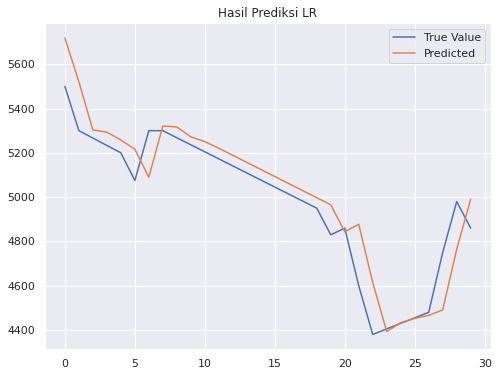

In [ ]:
from sklearn.linear_model import LinearRegression

LR = LinearRegression()
LR.fit(X_train, y_train)
y_pred_lr = LR.predict(X_test)
y_pred_lr_transform = scaler.inverse_transform([y_pred_lr])[0]

print("MLP")
print("MAE: ",mean_absolute_error(y_test_transform,y_pred_lr_transform))
print("MSE: ",mean_squared_error(y_test_transform,y_pred_lr_transform))
print("RMSE: ", np.sqrt(mean_squared_error(y_test_transform,y_pred_lr_transform)))
print("MAPE: ",mean_absolute_percentage_error(y_test_transform,y_pred_lr_transform)*100)
print("R2: ",r2_score(y_test_transform,y_pred_lr_transform))
print("")

plt.figure(figsize=(8,6))
plt.plot(y_test_transform, label='True Value')
plt.plot(y_pred_lr_transform,label='Predicted')
plt.legend()
plt.title('Hasil Prediksi LR')

In [ ]:
df_pred_class_mdka['mdka_lr'] = y_pred_lr_transform

# df_pred_class_mdka.reset_index(drop=True, inplace=True)

# Labelling Data hasil prediksi

label = []
prctg = []
for idx,data in enumerate(df_pred_class_mdka['mdka_lr']):
    if idx != (len(df_pred_class_mdka)-1):
        prctg_value = round((abs(df_pred_class_mdka['mdka_lr'][idx+1] - data)/data)*100, ndigits=2)
        prctg.append(prctg_value)
        if data < df_pred_class_mdka['mdka_lr'][idx+1]:
            label.append('Naik')
        elif data > df_pred_class_mdka['mdka_lr'][idx+1]:
            label.append('Turun')
        else:
            label.append('Tetap')

df_pred_class_mdka['label_lr'] = np.NaN
df_pred_class_mdka['label_lr'][1:] = label

df_pred_class_mdka['prctg_lr'] = np.NaN
df_pred_class_mdka['prctg_lr'][1:] = prctg
df_pred_class_mdka

,Date,y_true,label_true,prctg_true,mdka_prophet,label_fb_prophet,prctg_prophet,mdka_mlp,label_mlp,prctg_mlp,mdka_lr,label_lr,prctg_lr
0,2022-04-21,5500.000000,NaN,NaN,4582.484757,NaN,NaN,5656.616041,NaN,NaN,5718.404008,NaN,NaN
1,2022-04-22,5300.000000,Turun,3.64,4583.698033,Naik,0.03,5592.978774,Turun,1.13,5521.061925,Turun,3.45
2,2022-04-23,5266.666667,Turun,0.63,4581.691964,Turun,0.04,5336.621071,Turun,4.58,5303.310405,Turun,3.94
3,2022-04-24,5233.333333,Turun,0.63,4579.254901,Turun,0.05,5360.959525,Naik,0.46,5293.408922,Turun,0.19
4,2022-04-25,5200.000000,Turun,0.64,4576.647285,Turun,0.06,5183.344485,Turun,3.31,5257.802402,Turun,0.67
5,2022-04-26,5075.000000,Turun,2.40,4566.826608,Turun,0.21,5163.953220,Turun,0.37,5216.489981,Turun,0.79
6,2022-04-27,5300.000000,Naik,4.43,4564.063877,Turun,0.06,5123.153685,Turun,0.79,5089.796044,Turun,2.43
7,2022-04-28,5300.000000,Tetap,0.00,4557.494831,Turun,0.14,5215.889962,Naik,1.81,5321.115818,Naik,4.54
8,2022-04-29,5268.181818,Turun,0.60,4557.901853,Naik,0.01,5286.178693,Naik,1.35,5316.764350,Turun,0.08
9,2022-04-30,5236.363636,Turun,0.60,4556.132447,Turun,0.04,5274.710750,Turun,0.22,5271.992301,Turun,0.84


mana yang worst case ?
- sebenarnya tetap diprediksi naik
- sebenarnya tetap diprediksi turun
- sebenarnya turun diprediksi tetap
- sebenarnya naik diprediksi tetap 

## Prediksi senin 23 Mei 2022

## LSTM

In [ ]:
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import Flatten
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [ ]:
trainX = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
testX = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

In [ ]:
trainX.shape

(1930, 1, 5)

In [ ]:
model = Sequential()
model.add(LSTM(96,return_sequences = True, input_shape=(1, 5)))
model.add(Dropout(0.2))
model.add(LSTM(96,return_sequences = True))
model.add(Dropout(0.2))
model.add(LSTM(96,return_sequences = True))
model.add(Dropout(0.2))
model.add(LSTM(96,return_sequences = True))
model.add(Flatten())
model.add(Dropout(0.2))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adamax')
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 1, 96)             39168     
                                                                 
 dropout_4 (Dropout)         (None, 1, 96)             0         
                                                                 
 lstm_5 (LSTM)               (None, 1, 96)             74112     
                                                                 
 dropout_5 (Dropout)         (None, 1, 96)             0         
                                                                 
 lstm_6 (LSTM)               (None, 1, 96)             74112     
                                                                 
 dropout_6 (Dropout)         (None, 1, 96)             0         
                                                                 
 lstm_7 (LSTM)               (None, 1, 96)            

In [ ]:
50 epochs

In [ ]:
history = model.fit(trainX, y_train, epochs=50, batch_size=8, verbose=2)

Epoch 1/50
242/242 - 10s - loss: 0.0190 - 10s/epoch - 40ms/step
Epoch 2/50
242/242 - 2s - loss: 0.0018 - 2s/epoch - 7ms/step
Epoch 3/50
242/242 - 2s - loss: 0.0015 - 2s/epoch - 7ms/step
Epoch 4/50
242/242 - 2s - loss: 0.0014 - 2s/epoch - 7ms/step
Epoch 5/50
242/242 - 2s - loss: 0.0011 - 2s/epoch - 7ms/step
Epoch 6/50
242/242 - 2s - loss: 9.4818e-04 - 2s/epoch - 7ms/step
Epoch 7/50
242/242 - 2s - loss: 0.0010 - 2s/epoch - 7ms/step
Epoch 8/50
242/242 - 2s - loss: 9.6513e-04 - 2s/epoch - 7ms/step
Epoch 9/50
242/242 - 2s - loss: 9.6907e-04 - 2s/epoch - 7ms/step
Epoch 10/50
242/242 - 2s - loss: 8.6190e-04 - 2s/epoch - 7ms/step
Epoch 11/50
242/242 - 2s - loss: 8.7225e-04 - 2s/epoch - 7ms/step
Epoch 12/50
242/242 - 2s - loss: 7.8240e-04 - 2s/epoch - 7ms/step
Epoch 13/50
242/242 - 2s - loss: 8.7811e-04 - 2s/epoch - 7ms/step
Epoch 14/50
242/242 - 2s - loss: 8.3550e-04 - 2s/epoch - 7ms/step
Epoch 15/50
242/242 - 2s - loss: 7.2901e-04 - 2s/epoch - 7ms/step
Epoch 16/50
242/242 - 2s - loss: 7.7416e

LSTM
MAE:  126.52079042376893
MSE:  27753.236319647487
RMSE:  166.5930260234428
MAPE:  2.6183314469809393
R2:  0.7071828190422668



Text(0.5, 1.0, 'Hasil Prediksi LSTM')

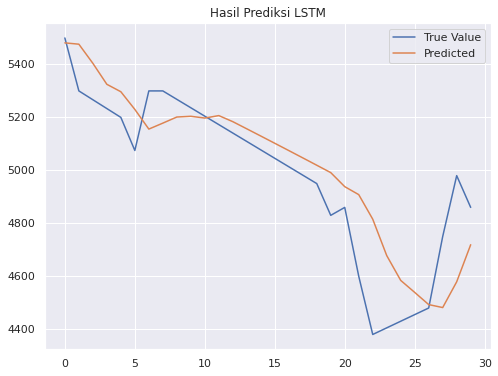

In [ ]:
y_pred_lstm = model.predict(testX)
y_pred_lstm_transform = scaler.inverse_transform(y_pred_lstm)

print("LSTM")
print("MAE: ",mean_absolute_error(y_test_transform,y_pred_lstm_transform))
print("MSE: ",mean_squared_error(y_test_transform,y_pred_lstm_transform))
print("RMSE: ", np.sqrt(mean_squared_error(y_test_transform,y_pred_lstm_transform)))
print("MAPE: ",mean_absolute_percentage_error(y_test_transform,y_pred_lstm_transform)*100)
print("R2: ",r2_score(y_test_transform,y_pred_lstm_transform))
print("")

plt.figure(figsize=(8,6))
plt.plot(y_test_transform, label='True Value')
plt.plot(y_pred_lstm_transform,label='Predicted')
plt.legend()
plt.title('Hasil Prediksi LSTM')

In [ ]:
df_pred_class_mdka['mdka_lstm'] = y_pred_lstm_transform

# df_pred_class.reset_index(drop=True, inplace=True)

# Labelling Data hasil prediksi

label = []
prctg = []

for idx,data in enumerate(df_pred_class_mdka['mdka_lstm']):
    if idx != (len(df_pred_class_mdka)-1):
        prctg_value = round((abs(df_pred_class_mdka['mdka_lstm'][idx+1] - data)/data)*100, ndigits=2)
        prctg.append(prctg_value)
        if data < df_pred_class_mdka['mdka_lstm'][idx+1]:
            label.append('Naik')
        elif data > df_pred_class_mdka['mdka_lstm'][idx+1]:
            label.append('Turun')
        else:
            label.append('Tetap')

df_pred_class_mdka['label_lstm'] = np.NaN
df_pred_class_mdka['label_lstm'][1:] = label

df_pred_class_mdka['prctg_lstm'] = np.NaN
df_pred_class_mdka['prctg_lstm'][1:] = prctg
df_pred_class_mdka

,Date,y_true,label_true,prctg_true,mdka_prophet,label_fb_prophet,prctg_prophet,mdka_mlp,label_mlp,prctg_mlp,mdka_lr,label_lr,prctg_lr,mdka_lstm,label_lstm,prctg_lstm
0,2022-04-21,5500.000000,NaN,NaN,4582.484757,NaN,NaN,5656.616041,NaN,NaN,5718.404008,NaN,NaN,5481.462402,NaN,NaN
1,2022-04-22,5300.000000,Turun,3.64,4583.698033,Naik,0.03,5592.978774,Turun,1.13,5521.061925,Turun,3.45,5476.482422,Turun,0.09
2,2022-04-23,5266.666667,Turun,0.63,4581.691964,Turun,0.04,5336.621071,Turun,4.58,5303.310405,Turun,3.94,5404.250000,Turun,1.32
3,2022-04-24,5233.333333,Turun,0.63,4579.254901,Turun,0.05,5360.959525,Naik,0.46,5293.408922,Turun,0.19,5324.970215,Turun,1.47
4,2022-04-25,5200.000000,Turun,0.64,4576.647285,Turun,0.06,5183.344485,Turun,3.31,5257.802402,Turun,0.67,5296.899902,Turun,0.53
5,2022-04-26,5075.000000,Turun,2.40,4566.826608,Turun,0.21,5163.953220,Turun,0.37,5216.489981,Turun,0.79,5230.136719,Turun,1.26
6,2022-04-27,5300.000000,Naik,4.43,4564.063877,Turun,0.06,5123.153685,Turun,0.79,5089.796044,Turun,2.43,5155.791504,Turun,1.42
7,2022-04-28,5300.000000,Tetap,0.00,4557.494831,Turun,0.14,5215.889962,Naik,1.81,5321.115818,Naik,4.54,5178.312988,Naik,0.44
8,2022-04-29,5268.181818,Turun,0.60,4557.901853,Naik,0.01,5286.178693,Naik,1.35,5316.764350,Turun,0.08,5201.364258,Naik,0.45
9,2022-04-30,5236.363636,Turun,0.60,4556.132447,Turun,0.04,5274.710750,Turun,0.22,5271.992301,Turun,0.84,5204.201172,Naik,0.05


In [ ]:
df_pred_class_mdka.head()

,Date,y_true,label_true,prctg_true,mdka_prophet,label_fb_prophet,prctg_prophet,mdka_mlp,label_mlp,prctg_mlp,mdka_lr,label_lr,prctg_lr,mdka_lstm,label_lstm,prctg_lstm
0,2022-04-21,5500.000000,NaN,NaN,4582.484757,NaN,NaN,5656.616041,NaN,NaN,5718.404008,NaN,NaN,5481.462402,NaN,NaN
1,2022-04-22,5300.000000,Turun,3.64,4583.698033,Naik,0.03,5592.978774,Turun,1.13,5521.061925,Turun,3.45,5476.482422,Turun,0.09
2,2022-04-23,5266.666667,Turun,0.63,4581.691964,Turun,0.04,5336.621071,Turun,4.58,5303.310405,Turun,3.94,5404.250000,Turun,1.32
3,2022-04-24,5233.333333,Turun,0.63,4579.254901,Turun,0.05,5360.959525,Naik,0.46,5293.408922,Turun,0.19,5324.970215,Turun,1.47
4,2022-04-25,5200.000000,Turun,0.64,4576.647285,Turun,0.06,5183.344485,Turun,3.31,5257.802402,Turun,0.67,5296.899902,Turun,0.53


In [ ]:
df_pred_class_mdka.to_csv('MDKA_RESULT.CSV', index=False)

In [ ]:
np.arange(30)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29])

In [ ]:
df_pred_class_mdka.groupby('Date')[['y_true','mdka_prophet']].sum().plot(kind='bar', figsize=(18,9))
plt.title('Hasil Prediksi Linear Regression')
plt.show()

In [ ]:
# EVALUASI PREDIKSI MOVEMENT

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, recall_score, precision_score, f1_score
pred_columns = ['label_fb_prophet','label_mlp','label_lr','label_lstm']

for column in pred_columns:
  # print('#'*20)
  print('#'*20, column ,'#'*20)
  print(accuracy_score(df_pred_class_mdka[column][1:], df_pred_class_mdka['label_true'][1:]))
  print(confusion_matrix(df_pred_class_mdka[column][1:], df_pred_class_mdka['label_true'][1:]))
  print(classification_report(df_pred_class_mdka[column][1:], df_pred_class_mdka['label_true'][1:]))
  print()

#################### label_fb_prophet ####################
0.5862068965517241
[[ 7  0 10]
 [ 0  0  0]
 [ 1  1 10]]
              precision    recall  f1-score   support

        Naik       0.88      0.41      0.56        17
       Tetap       0.00      0.00      0.00         0
       Turun       0.50      0.83      0.62        12

    accuracy                           0.59        29
   macro avg       0.46      0.42      0.40        29
weighted avg       0.72      0.59      0.59        29


#################### label_mlp ####################
0.6551724137931034
[[ 3  1  4]
 [ 0  0  0]
 [ 5  0 16]]
              precision    recall  f1-score   support

        Naik       0.38      0.38      0.38         8
       Tetap       0.00      0.00      0.00         0
       Turun       0.80      0.76      0.78        21

    accuracy                           0.66        29
   macro avg       0.39      0.38      0.39        29
weighted avg       0.68      0.66      0.67        29


#############

In [ ]:
model_name = [] # model
acs = [] # accuracy
rcs = [] # reccall
pcs = [] # precision
f1s = [] # f1score

for column in pred_columns:
  # df_movement_evaluation['Model']
  model_name.append(column)
  acc = accuracy_score(df_pred_class_mdka[column][1:], df_pred_class_mdka['label_true'][1:])
  recall = recall_score(df_pred_class_mdka[column][1:], df_pred_class_mdka['label_true'][1:], average='weighted')
  precision = precision_score(df_pred_class_mdka[column][1:], df_pred_class_mdka['label_true'][1:],average='weighted')
  f1 = f1_score(df_pred_class_mdka[column][1:], df_pred_class_mdka['label_true'][1:],average='weighted')
  acs.append(acc)
  rcs.append(recall)
  pcs.append(precision)
  f1s.append(f1)

df_movement_evaluation = pd.DataFrame({
    'Model' : model_name,
    'Accuracy' : acs,
    'Recall' : rcs,
    'Precision' : pcs,
    'F1_Score' : f1s
})
df_movement_evaluation.sort_values('Accuracy',ascending=False)

,Model,Accuracy,Recall,Precision,F1_Score
2,label_lr,0.793103,0.793103,0.824138,0.808242
1,label_mlp,0.655172,0.655172,0.682759,0.668629
0,label_fb_prophet,0.586207,0.586207,0.719828,0.586897
3,label_lstm,0.586207,0.586207,0.660345,0.619773


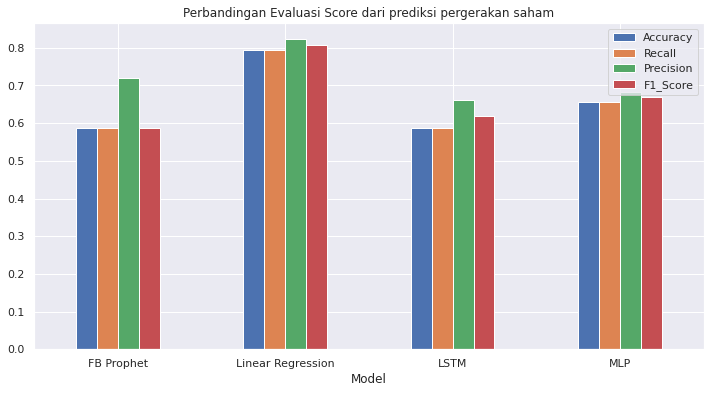

In [ ]:
df_movement_evaluation.groupby('Model')['Accuracy',	'Recall',	'Precision',	'F1_Score'].sum().plot(kind='bar',figsize=(12,6))
plt.xticks([0,1,2,3], rotation=0, labels=['FB Prophet','Linear Regression','LSTM','MLP'])
plt.title('Perbandingan Evaluasi Score dari prediksi pergerakan saham')
plt.show()

In [ ]:
50 epoch 
MAE:  109.79965080492424
MSE:  21774.714227507644
RMSE:  147.5625773274093
MAPE:  1.4082736950919499
R2:  0.7131396838539182

--------------------------------------
100 epoch
MAE:  105.3783513849431
MSE:  17569.935322546782
RMSE:  132.55163266646994
MAPE:  1.3651681073433886
R2:  0.768533485738018

--------------------------------------
200 epoch
MAE:  188.7278157552083
MSE:  50541.03936886214
RMSE:  224.8133433959429
MAPE:  2.396853688179851
R2:  0.33417181138533647

-------------------------------------
400 epoch

MAE:  133.68066850142043
MSE:  29924.33240665239
RMSE:  172.98650931980907
MAPE:  1.7004319124137826
R2:  0.6057765275381394

-------------------------------------
600 epoch

MAE:  134.55907167376884
MSE:  26105.403730819737
RMSE:  161.57166747551915
MAPE:  1.7433592843749557
R2:  0.6560871344119034

#SAME

In [ ]:
df_same = pd.read_csv('/content/SAME.JK.csv')
df_same['Date'] = pd.to_datetime(df_same['Date'])
df_same

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-01-02,560.0,560.0,560.0,560.0,555.576416,0.0
1,2017-01-03,560.0,562.0,556.0,558.0,553.592224,2125000.0
2,2017-01-04,558.0,562.0,556.0,560.0,555.576416,2339000.0
3,2017-01-05,560.0,564.0,560.0,562.0,557.560608,1968500.0
4,2017-01-06,562.0,564.0,560.0,562.0,557.560608,1944000.0
...,...,...,...,...,...,...,...
1349,2022-05-19,390.0,392.0,372.0,378.0,378.000000,23169900.0
1350,2022-05-20,380.0,398.0,376.0,392.0,392.000000,27298400.0
1351,2022-05-23,394.0,400.0,386.0,400.0,400.000000,6778200.0
1352,2022-05-24,402.0,410.0,396.0,400.0,400.000000,13810000.0


In [ ]:
new_df_same = df_same.merge(df_date, on=['Date'], how='right')
new_df_same

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-01-01,NaN,NaN,NaN,NaN,NaN,NaN
1,2017-01-02,560.0,560.0,560.0,560.0,555.576416,0.0
2,2017-01-03,560.0,562.0,556.0,558.0,553.592224,2125000.0
3,2017-01-04,558.0,562.0,556.0,560.0,555.576416,2339000.0
4,2017-01-05,560.0,564.0,560.0,562.0,557.560608,1968500.0
...,...,...,...,...,...,...,...
1961,2022-05-16,NaN,NaN,NaN,NaN,NaN,NaN
1962,2022-05-17,350.0,372.0,350.0,368.0,368.000000,7525300.0
1963,2022-05-18,370.0,392.0,368.0,390.0,390.000000,16656800.0
1964,2022-05-19,390.0,392.0,372.0,378.0,378.000000,23169900.0


In [ ]:
same_full = new_df_same[['Date','Close']]
same_full['Close'] = same_full['Close'].interpolate(method='linear',limit_direction ='forward')
same_full = same_full[1:].reset_index(drop=True)
same_full

,Date,Close
0,2017-01-02,560.0
1,2017-01-03,558.0
2,2017-01-04,560.0
3,2017-01-05,562.0
4,2017-01-06,562.0
...,...,...
1960,2022-05-16,363.5
1961,2022-05-17,368.0
1962,2022-05-18,390.0
1963,2022-05-19,378.0


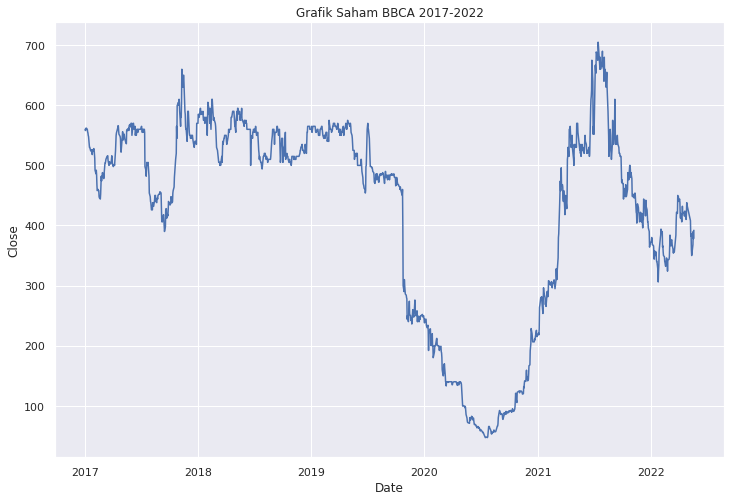

In [ ]:
plt.figure(figsize=(12,8))
sns.lineplot(data=same_full, x='Date',y='Close')
plt.title('Grafik Saham BBCA 2017-2022')
sns.set_theme()

In [ ]:
df_pred_same = pd.DataFrame({
    'ds' : same_full['Date'],
    'y' : same_full['Close']
})
df_pred_same

,ds,y
0,2017-01-02,560.0
1,2017-01-03,558.0
2,2017-01-04,560.0
3,2017-01-05,562.0
4,2017-01-06,562.0
...,...,...
1960,2022-05-16,363.5
1961,2022-05-17,368.0
1962,2022-05-18,390.0
1963,2022-05-19,378.0


## FB Prophet

In [ ]:
train_proph_same = df_pred_same.iloc[:-30]
test_proph_same = df_pred_same.iloc[-30:]

test_proph_same.reset_index(inplace=True)

In [ ]:
m = Prophet(weekly_seasonality=True, yearly_seasonality=True)
m.fit(train_proph_same)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
future = m.make_future_dataframe(360,include_history=False)

forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head()

,ds,yhat,yhat_lower,yhat_upper
0,2022-04-21,441.289352,387.395931,484.269248
1,2022-04-22,441.594059,395.248203,486.711398
2,2022-04-23,442.615186,391.975759,488.864981
3,2022-04-24,443.447274,397.728092,491.535470
4,2022-04-25,444.159130,395.031195,492.941728


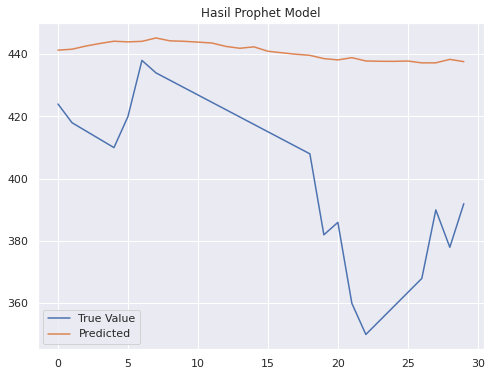

In [ ]:
plt.figure(figsize=(8,6))
test_proph_same['y'].plot(label='True Value')
forecast['yhat'][:30].plot(label='Predicted')
plt.title('Hasil Prophet Model')
plt.legend()

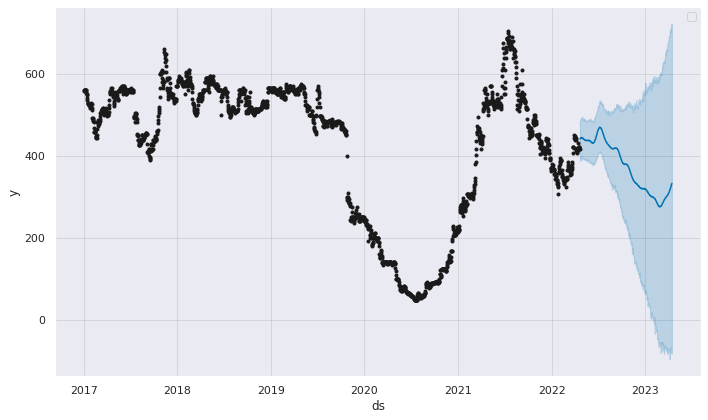

In [ ]:
# only future data

fig1 = m.plot(forecast)
plt.legend()

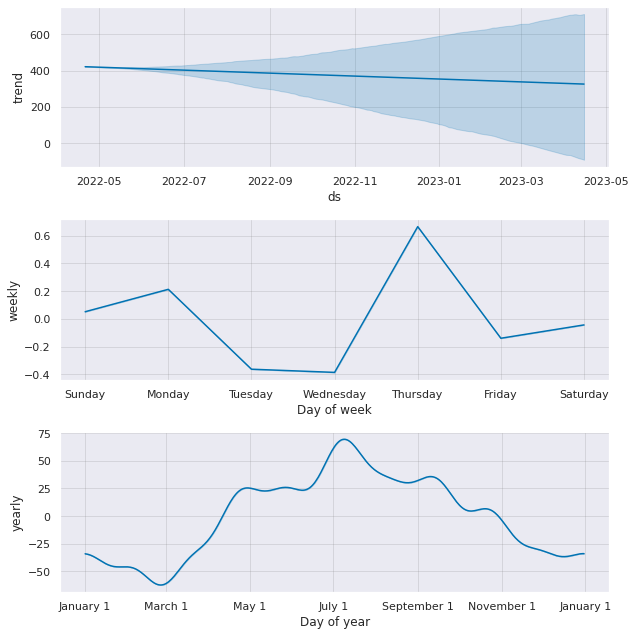

In [ ]:
fig2 = m.plot_components(forecast)

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
# import numpy as np j
print("Prophet Model")
print("MAE: ",mean_absolute_error(test_proph_same['y'],forecast['yhat'][:30]))
print("MSE: ",mean_squared_error(test_proph_same['y'],forecast['yhat'][:30]))
print("RMSE: ", np.sqrt(mean_squared_error(test_proph_same['y'],forecast['yhat'][:30])))
print("MAPE: ",mean_absolute_percentage_error(test_proph_same['y'],forecast['yhat'][:30])*100)
print("R2: ",r2_score(test_proph_same['y'],forecast['yhat'][:30]))
print("")

Prophet Model
MAE:  38.4679086767962
MSE:  2051.733252010808
RMSE:  45.29606221307552
MAPE:  10.007938417098629
R2:  -1.998392641926594



In [ ]:
# Labelling Data Aktual

df_pred_class_same = same_full[-30:].copy().rename(columns={'Close':'y_true'}).reset_index(drop=True)

# df_pred_class['y_true'] = test['y']

label = []
prctg = []
for idx,data in enumerate(df_pred_class_same['y_true']):
    if idx != (len(df_pred_class_same)-1):

        prctg_value = round((abs(df_pred_class_same['y_true'][idx+1] - data)/data)*100, ndigits=2)
        prctg.append(prctg_value)
        if data < df_pred_class_same['y_true'][idx+1]:
            label.append('Naik')
        elif data > df_pred_class_same['y_true'][idx+1]:
            label.append('Turun')
        else:
            label.append('Tetap')

df_pred_class_same['label_true'] = np.NaN
df_pred_class_same['label_true'][1:] = label

df_pred_class_same['prctg_true'] = np.NaN
df_pred_class_same['prctg_true'][1:] = prctg
df_pred_class_same

,Date,y_true,label_true,prctg_true
0,2022-04-21,424.000000,NaN,NaN
1,2022-04-22,418.000000,Turun,1.42
2,2022-04-23,415.333333,Turun,0.64
3,2022-04-24,412.666667,Turun,0.64
4,2022-04-25,410.000000,Turun,0.65
5,2022-04-26,420.000000,Naik,2.44
6,2022-04-27,438.000000,Naik,4.29
7,2022-04-28,434.000000,Turun,0.91
8,2022-04-29,431.636364,Turun,0.54
9,2022-04-30,429.272727,Turun,0.55


In [ ]:
# DATAFRAME UNTUK MELIHAT PERGERAKAN HARGA SAHAM (NAIK/TURUN/TETAP)

df_pred_class_same['same_prophet'] = forecast['yhat'][:30]

# df_pred_class_same.reset_index(drop=True, inplace=True)

# Labelling Data hasil prediksi

label = []
prctg = []
for idx,data in enumerate(df_pred_class_same['same_prophet']):
    if idx != (len(df_pred_class_same)-1):
        prctg_value = round((abs(df_pred_class_same['same_prophet'][idx+1] - data)/data)*100, ndigits=2)
        prctg.append(prctg_value)
        if data < df_pred_class_same['same_prophet'][idx+1]:
            label.append('Naik')
        elif data > df_pred_class_same['same_prophet'][idx+1]:
            label.append('Turun')
        else:
            label.append('Tetap')

df_pred_class_same['label_fb_prophet'] = np.NaN
df_pred_class_same['label_fb_prophet'][1:] = label

df_pred_class_same['prctg_prophet'] = np.NaN
df_pred_class_same['prctg_prophet'][1:] = prctg
df_pred_class_same

,Date,y_true,label_true,prctg_true,same_prophet,label_fb_prophet,prctg_prophet
0,2022-04-21,424.000000,NaN,NaN,441.289352,NaN,NaN
1,2022-04-22,418.000000,Turun,1.42,441.594059,Naik,0.07
2,2022-04-23,415.333333,Turun,0.64,442.615186,Naik,0.23
3,2022-04-24,412.666667,Turun,0.64,443.447274,Naik,0.19
4,2022-04-25,410.000000,Turun,0.65,444.159130,Naik,0.16
5,2022-04-26,420.000000,Naik,2.44,443.950709,Turun,0.05
6,2022-04-27,438.000000,Naik,4.29,444.122148,Naik,0.04
7,2022-04-28,434.000000,Turun,0.91,445.206230,Naik,0.24
8,2022-04-29,431.636364,Turun,0.54,444.285337,Turun,0.21
9,2022-04-30,429.272727,Turun,0.55,444.135454,Turun,0.03


## MLP

In [ ]:
df_ml = same_full[['Close']]
df_ml.tail()

,Close
1960,363.5
1961,368.0
1962,390.0
1963,378.0
1964,392.0


In [ ]:
# Train Test Sebelum di Normalisasi

train_data = df_ml.iloc[:-30]
test_data = df_ml.iloc[-30:]

**Untuk normalisasi data**

- Data frame dibagi train,test terlebih dahulu
- kemudian data train di scaling
- kemudian scaler di transform ke train dan test
- setelah di transform , train dan test digabung kembali
- baru kemudian di hitung lag datanya
- kemudian di bagi lagi menjadi train dan test

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, MaxAbsScaler, QuantileTransformer
scaler = MinMaxScaler()
# y = np.array(df_encode['Balance']).reshape(-1,1)
columns = list(train_data.columns)
scaler.fit(train_data[columns])

train_scaled = scaler.transform(train_data)
test_scaled = scaler.transform(test_data)

train_data[columns] = train_scaled
test_data[columns] = test_scaled

In [ ]:
df_ml_scaled = train_data.append(test_data)

In [ ]:
lag_df = LaggedFeatures(df_ml_scaled, lag=5, fillna=True, dropna=True)
lag_df.tail()

,Close,Close_lag1,Close_lag2,Close_lag3,Close_lag4,Close_lag5
1960,0.480868,0.474027,0.467187,0.460346,0.475547,0.515071
1961,0.487709,0.480868,0.474027,0.467187,0.460346,0.475547
1962,0.521152,0.487709,0.480868,0.474027,0.467187,0.460346
1963,0.502910,0.521152,0.487709,0.480868,0.474027,0.467187
1964,0.524192,0.502910,0.521152,0.487709,0.480868,0.474027


In [ ]:
train = lag_df.iloc[:-30]
test = lag_df.iloc[-30:]

In [ ]:
X_train = train.drop("Close", axis=1)
X_test = test.drop("Close", axis=1)

y_train = train["Close"]
y_test = test["Close"]

X_train = X_train.astype(float).values
y_train = y_train.astype(float).values

X_test = X_test.astype(float).values
y_test = y_test.astype(float).values

In [ ]:
y_test_transform = scaler.inverse_transform([y_test])[0]
y_test_transform

array([424.        , 418.        , 415.33333333, 412.66666667,
       410.        , 420.        , 438.        , 434.        ,
       431.63636364, 429.27272727, 426.90909091, 424.54545455,
       422.18181818, 419.81818182, 417.45454545, 415.09090909,
       412.72727273, 410.36363636, 408.        , 382.        ,
       386.        , 360.        , 350.        , 354.5       ,
       359.        , 363.5       , 368.        , 390.        ,
       378.        , 392.        ])

MLP
MAE:  7.387283586902822
MSE:  103.45519908569818
RMSE:  10.171292891550129
MAPE:  1.8889970753935854
R2:  0.8488110930582247



Text(0.5, 1.0, 'Hasil Prediksi MLP')

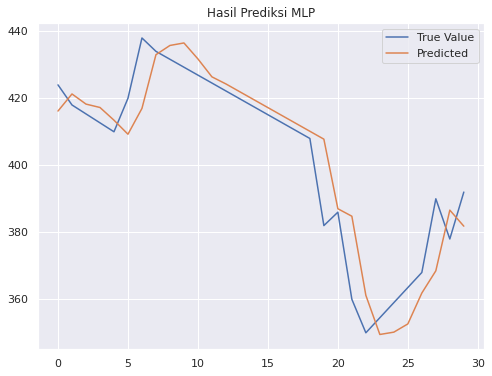

In [ ]:
from sklearn.neural_network import MLPRegressor

mlp = MLPRegressor(hidden_layer_sizes=(150,100,50),
                       max_iter = 300,activation = 'identity',
                       solver = 'lbfgs')
mlp.fit(X_train, y_train)
y_pred_mlp = mlp.predict(X_test)
y_pred_transform = scaler.inverse_transform([y_pred_mlp])[0]

print("MLP")
print("MAE: ",mean_absolute_error(y_test_transform,y_pred_transform))
print("MSE: ",mean_squared_error(y_test_transform,y_pred_transform))
print("RMSE: ", np.sqrt(mean_squared_error(y_test_transform,y_pred_transform)))
print("MAPE: ",mean_absolute_percentage_error(y_test_transform,y_pred_transform)*100)
print("R2: ",r2_score(y_test_transform,y_pred_transform))
print("")

plt.figure(figsize=(8,6))
plt.plot(y_test_transform, label='True Value')
plt.plot(y_pred_transform,label='Predicted')
plt.legend()
plt.title('Hasil Prediksi MLP')

In [ ]:
df_pred_class_same['same_mlp'] = y_pred_transform

label = []
prctg = []
for idx,data in enumerate(df_pred_class_same['same_mlp']):
    if idx != (len(df_pred_class_same)-1):
        prctg_value = round((abs(df_pred_class_same['same_mlp'][idx+1] - data)/data)*100, ndigits=2)
        prctg.append(prctg_value)
        if data < df_pred_class_same['same_mlp'][idx+1]:
            label.append('Naik')
        elif data > df_pred_class_same['same_mlp'][idx+1]:
            label.append('Turun')
        else:
            label.append('Tetap')

df_pred_class_same['label_mlp'] = np.NaN
df_pred_class_same['label_mlp'][1:] = label

df_pred_class_same['prctg_mlp'] = np.NaN
df_pred_class_same['prctg_mlp'][1:] = prctg

df_pred_class_same

,Date,y_true,label_true,prctg_true,same_prophet,label_fb_prophet,prctg_prophet,same_mlp,label_mlp,prctg_mlp
0,2022-04-21,424.000000,NaN,NaN,441.289352,NaN,NaN,416.188878,NaN,NaN
1,2022-04-22,418.000000,Turun,1.42,441.594059,Naik,0.07,421.286694,Naik,1.22
2,2022-04-23,415.333333,Turun,0.64,442.615186,Naik,0.23,418.262215,Turun,0.72
3,2022-04-24,412.666667,Turun,0.64,443.447274,Naik,0.19,417.250695,Turun,0.24
4,2022-04-25,410.000000,Turun,0.65,444.159130,Naik,0.16,413.459220,Turun,0.91
5,2022-04-26,420.000000,Naik,2.44,443.950709,Turun,0.05,409.268785,Turun,1.01
6,2022-04-27,438.000000,Naik,4.29,444.122148,Naik,0.04,416.973543,Naik,1.88
7,2022-04-28,434.000000,Turun,0.91,445.206230,Naik,0.24,433.007768,Naik,3.85
8,2022-04-29,431.636364,Turun,0.54,444.285337,Turun,0.21,435.763486,Naik,0.64
9,2022-04-30,429.272727,Turun,0.55,444.135454,Turun,0.03,436.513026,Naik,0.17


## Linear Regression

MLP
MAE:  6.921079998977301
MSE:  97.8877572672274
RMSE:  9.893824198318232
MAPE:  1.765962553534047
R2:  0.8569473244940105



Text(0.5, 1.0, 'Hasil Prediksi LR')

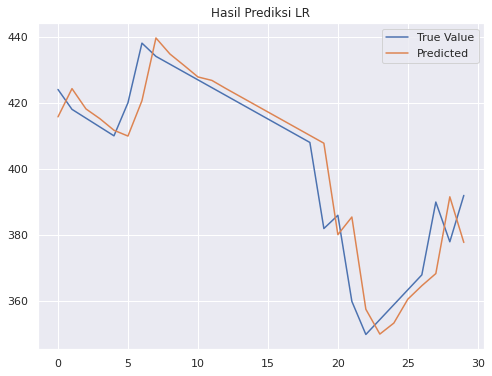

In [ ]:
from sklearn.linear_model import LinearRegression

LR = LinearRegression()
LR.fit(X_train, y_train)
y_pred_lr = LR.predict(X_test)
y_pred_lr_transform = scaler.inverse_transform([y_pred_lr])[0]

print("MLP")
print("MAE: ",mean_absolute_error(y_test_transform,y_pred_lr_transform))
print("MSE: ",mean_squared_error(y_test_transform,y_pred_lr_transform))
print("RMSE: ", np.sqrt(mean_squared_error(y_test_transform,y_pred_lr_transform)))
print("MAPE: ",mean_absolute_percentage_error(y_test_transform,y_pred_lr_transform)*100)
print("R2: ",r2_score(y_test_transform,y_pred_lr_transform))
print("")

plt.figure(figsize=(8,6))
plt.plot(y_test_transform, label='True Value')
plt.plot(y_pred_lr_transform,label='Predicted')
plt.legend()
plt.title('Hasil Prediksi LR')

In [ ]:
df_pred_class_same['same_lr'] = y_pred_lr_transform

# df_pred_class_same.reset_index(drop=True, inplace=True)

# Labelling Data hasil prediksi

label = []
prctg = []
for idx,data in enumerate(df_pred_class_same['same_lr']):
    if idx != (len(df_pred_class_same)-1):
        prctg_value = round((abs(df_pred_class_same['same_lr'][idx+1] - data)/data)*100, ndigits=2)
        prctg.append(prctg_value)
        if data < df_pred_class_same['same_lr'][idx+1]:
            label.append('Naik')
        elif data > df_pred_class_same['same_lr'][idx+1]:
            label.append('Turun')
        else:
            label.append('Tetap')

df_pred_class_same['label_lr'] = np.NaN
df_pred_class_same['label_lr'][1:] = label

df_pred_class_same['prctg_lr'] = np.NaN
df_pred_class_same['prctg_lr'][1:] = prctg
df_pred_class_same

,Date,y_true,label_true,prctg_true,same_prophet,label_fb_prophet,prctg_prophet,same_mlp,label_mlp,prctg_mlp,same_lr,label_lr,prctg_lr
0,2022-04-21,424.000000,NaN,NaN,441.289352,NaN,NaN,416.188878,NaN,NaN,415.734009,NaN,NaN
1,2022-04-22,418.000000,Turun,1.42,441.594059,Naik,0.07,421.286694,Naik,1.22,424.261007,Naik,2.05
2,2022-04-23,415.333333,Turun,0.64,442.615186,Naik,0.23,418.262215,Turun,0.72,418.124118,Turun,1.45
3,2022-04-24,412.666667,Turun,0.64,443.447274,Naik,0.19,417.250695,Turun,0.24,415.161952,Turun,0.71
4,2022-04-25,410.000000,Turun,0.65,444.159130,Naik,0.16,413.459220,Turun,0.91,411.684027,Turun,0.84
5,2022-04-26,420.000000,Naik,2.44,443.950709,Turun,0.05,409.268785,Turun,1.01,409.931274,Turun,0.43
6,2022-04-27,438.000000,Naik,4.29,444.122148,Naik,0.04,416.973543,Naik,1.88,420.613406,Naik,2.61
7,2022-04-28,434.000000,Turun,0.91,445.206230,Naik,0.24,433.007768,Naik,3.85,439.560682,Naik,4.50
8,2022-04-29,431.636364,Turun,0.54,444.285337,Turun,0.21,435.763486,Naik,0.64,434.711995,Turun,1.10
9,2022-04-30,429.272727,Turun,0.55,444.135454,Turun,0.03,436.513026,Naik,0.17,431.289212,Turun,0.79


mana yang worst case ?
- sebenarnya tetap diprediksi naik
- sebenarnya tetap diprediksi turun
- sebenarnya turun diprediksi tetap
- sebenarnya naik diprediksi tetap 

## Prediksi senin 23 Mei 2022

## LSTM

In [ ]:
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import Flatten
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [ ]:
trainX = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
testX = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

In [ ]:
trainX.shape

(1930, 1, 5)

In [ ]:
model = Sequential()
model.add(LSTM(96,return_sequences = True, input_shape=(1, 5)))
model.add(Dropout(0.2))
model.add(LSTM(96,return_sequences = True))
model.add(Dropout(0.2))
model.add(LSTM(96,return_sequences = True))
model.add(Dropout(0.2))
model.add(LSTM(96,return_sequences = True))
model.add(Flatten())
model.add(Dropout(0.2))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adamax')
print(model.summary())

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_12 (LSTM)              (None, 1, 96)             39168     
                                                                 
 dropout_12 (Dropout)        (None, 1, 96)             0         
                                                                 
 lstm_13 (LSTM)              (None, 1, 96)             74112     
                                                                 
 dropout_13 (Dropout)        (None, 1, 96)             0         
                                                                 
 lstm_14 (LSTM)              (None, 1, 96)             74112     
                                                                 
 dropout_14 (Dropout)        (None, 1, 96)             0         
                                                                 
 lstm_15 (LSTM)              (None, 1, 96)            

In [ ]:
50 epochs

In [ ]:
history = model.fit(trainX, y_train, epochs=50, batch_size=8, verbose=2)

Epoch 1/50
242/242 - 10s - loss: 0.0632 - 10s/epoch - 42ms/step
Epoch 2/50
242/242 - 2s - loss: 0.0074 - 2s/epoch - 7ms/step
Epoch 3/50
242/242 - 2s - loss: 0.0062 - 2s/epoch - 7ms/step
Epoch 4/50
242/242 - 2s - loss: 0.0055 - 2s/epoch - 7ms/step
Epoch 5/50
242/242 - 2s - loss: 0.0048 - 2s/epoch - 7ms/step
Epoch 6/50
242/242 - 2s - loss: 0.0041 - 2s/epoch - 7ms/step
Epoch 7/50
242/242 - 2s - loss: 0.0038 - 2s/epoch - 7ms/step
Epoch 8/50
242/242 - 2s - loss: 0.0035 - 2s/epoch - 7ms/step
Epoch 9/50
242/242 - 2s - loss: 0.0031 - 2s/epoch - 7ms/step
Epoch 10/50
242/242 - 2s - loss: 0.0030 - 2s/epoch - 7ms/step
Epoch 11/50
242/242 - 2s - loss: 0.0029 - 2s/epoch - 7ms/step
Epoch 12/50
242/242 - 2s - loss: 0.0026 - 2s/epoch - 10ms/step
Epoch 13/50
242/242 - 2s - loss: 0.0024 - 2s/epoch - 7ms/step
Epoch 14/50
242/242 - 2s - loss: 0.0022 - 2s/epoch - 7ms/step
Epoch 15/50
242/242 - 2s - loss: 0.0022 - 2s/epoch - 7ms/step
Epoch 16/50
242/242 - 2s - loss: 0.0023 - 2s/epoch - 7ms/step
Epoch 17/50
2

LSTM
MAE:  12.998713175455736
MSE:  241.4715859565793
RMSE:  15.539356034166259
MAPE:  3.2680505584348722
R2:  0.6471146403378865



Text(0.5, 1.0, 'Hasil Prediksi LSTM')

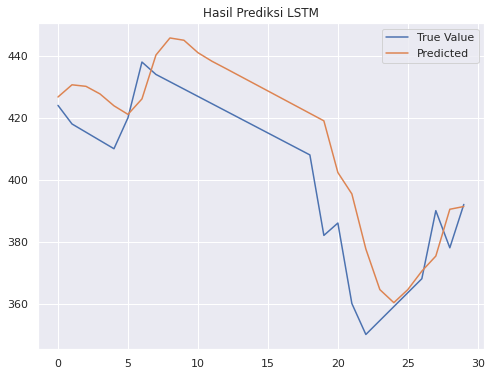

In [ ]:
y_pred_lstm = model.predict(testX)
y_pred_lstm_transform = scaler.inverse_transform(y_pred_lstm)

print("LSTM")
print("MAE: ",mean_absolute_error(y_test_transform,y_pred_lstm_transform))
print("MSE: ",mean_squared_error(y_test_transform,y_pred_lstm_transform))
print("RMSE: ", np.sqrt(mean_squared_error(y_test_transform,y_pred_lstm_transform)))
print("MAPE: ",mean_absolute_percentage_error(y_test_transform,y_pred_lstm_transform)*100)
print("R2: ",r2_score(y_test_transform,y_pred_lstm_transform))
print("")

plt.figure(figsize=(8,6))
plt.plot(y_test_transform, label='True Value')
plt.plot(y_pred_lstm_transform,label='Predicted')
plt.legend()
plt.title('Hasil Prediksi LSTM')

In [ ]:
df_pred_class_same['same_lstm'] = y_pred_lstm_transform

# df_pred_class.reset_index(drop=True, inplace=True)

# Labelling Data hasil prediksi

label = []
prctg = []

for idx,data in enumerate(df_pred_class_same['same_lstm']):
    if idx != (len(df_pred_class_same)-1):
        prctg_value = round((abs(df_pred_class_same['same_lstm'][idx+1] - data)/data)*100, ndigits=2)
        prctg.append(prctg_value)
        if data < df_pred_class_same['same_lstm'][idx+1]:
            label.append('Naik')
        elif data > df_pred_class_same['same_lstm'][idx+1]:
            label.append('Turun')
        else:
            label.append('Tetap')

df_pred_class_same['label_lstm'] = np.NaN
df_pred_class_same['label_lstm'][1:] = label

df_pred_class_same['prctg_lstm'] = np.NaN
df_pred_class_same['prctg_lstm'][1:] = prctg
df_pred_class_same

,Date,y_true,label_true,prctg_true,same_prophet,label_fb_prophet,prctg_prophet,same_mlp,label_mlp,prctg_mlp,same_lr,label_lr,prctg_lr,same_lstm,label_lstm,prctg_lstm
0,2022-04-21,424.000000,NaN,NaN,441.289352,NaN,NaN,416.188878,NaN,NaN,415.734009,NaN,NaN,426.713409,NaN,NaN
1,2022-04-22,418.000000,Turun,1.42,441.594059,Naik,0.07,421.286694,Naik,1.22,424.261007,Naik,2.05,430.648651,Naik,0.92
2,2022-04-23,415.333333,Turun,0.64,442.615186,Naik,0.23,418.262215,Turun,0.72,418.124118,Turun,1.45,430.155853,Turun,0.11
3,2022-04-24,412.666667,Turun,0.64,443.447274,Naik,0.19,417.250695,Turun,0.24,415.161952,Turun,0.71,427.707214,Turun,0.57
4,2022-04-25,410.000000,Turun,0.65,444.159130,Naik,0.16,413.459220,Turun,0.91,411.684027,Turun,0.84,423.867188,Turun,0.90
5,2022-04-26,420.000000,Naik,2.44,443.950709,Turun,0.05,409.268785,Turun,1.01,409.931274,Turun,0.43,421.097961,Turun,0.65
6,2022-04-27,438.000000,Naik,4.29,444.122148,Naik,0.04,416.973543,Naik,1.88,420.613406,Naik,2.61,426.090576,Naik,1.19
7,2022-04-28,434.000000,Turun,0.91,445.206230,Naik,0.24,433.007768,Naik,3.85,439.560682,Naik,4.50,440.264282,Naik,3.33
8,2022-04-29,431.636364,Turun,0.54,444.285337,Turun,0.21,435.763486,Naik,0.64,434.711995,Turun,1.10,445.779022,Naik,1.25
9,2022-04-30,429.272727,Turun,0.55,444.135454,Turun,0.03,436.513026,Naik,0.17,431.289212,Turun,0.79,445.041931,Turun,0.17


In [ ]:
df_pred_class_same.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Date              30 non-null     datetime64[ns]
 1   y_true            30 non-null     float64       
 2   label_true        29 non-null     object        
 3   prctg_true        29 non-null     float64       
 4   same_prophet      30 non-null     float64       
 5   label_fb_prophet  29 non-null     object        
 6   prctg_prophet     29 non-null     float64       
 7   same_mlp          30 non-null     float64       
 8   label_mlp         29 non-null     object        
 9   prctg_mlp         29 non-null     float64       
 10  same_lr           30 non-null     float64       
 11  label_lr          29 non-null     object        
 12  prctg_lr          29 non-null     float64       
 13  same_lstm         30 non-null     float32       
 14  label_lstm        29 non-nul

In [ ]:
df_pred_class_same.to_csv('SAME_RESULT.CSV', index=False)

In [ ]:
# EVALUASI PREDIKSI MOVEMENT

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, recall_score, precision_score, f1_score
pred_columns = ['label_fb_prophet','label_mlp','label_lr','label_lstm']

for column in pred_columns:
  # print('#'*20)
  print('#'*20, column ,'#'*20)
  print(accuracy_score(df_pred_class_same[column][1:], df_pred_class_same['label_true'][1:]))
  print(confusion_matrix(df_pred_class_same[column][1:], df_pred_class_same['label_true'][1:]))
  print(classification_report(df_pred_class_same[column][1:], df_pred_class_same['label_true'][1:]))
  print()

#################### label_fb_prophet ####################
0.5172413793103449
[[ 3  8]
 [ 6 12]]
              precision    recall  f1-score   support

        Naik       0.33      0.27      0.30        11
       Turun       0.60      0.67      0.63        18

    accuracy                           0.52        29
   macro avg       0.47      0.47      0.47        29
weighted avg       0.50      0.52      0.51        29


#################### label_mlp ####################
0.6896551724137931
[[ 5  5]
 [ 4 15]]
              precision    recall  f1-score   support

        Naik       0.56      0.50      0.53        10
       Turun       0.75      0.79      0.77        19

    accuracy                           0.69        29
   macro avg       0.65      0.64      0.65        29
weighted avg       0.68      0.69      0.69        29


#################### label_lr ####################
0.7241379310344828
[[ 5  4]
 [ 4 16]]
              precision    recall  f1-score   support

        Naik 

In [ ]:
model_name = [] # model
acs = [] # accuracy
rcs = [] # reccall
pcs = [] # precision
f1s = [] # f1score

for column in pred_columns:
  # df_movement_evaluation['Model']
  model_name.append(column)
  acc = accuracy_score(df_pred_class_same[column][1:], df_pred_class_same['label_true'][1:])
  recall = recall_score(df_pred_class_same[column][1:], df_pred_class_same['label_true'][1:], average='weighted')
  precision = precision_score(df_pred_class_same[column][1:], df_pred_class_same['label_true'][1:],average='weighted')
  f1 = f1_score(df_pred_class_same[column][1:], df_pred_class_same['label_true'][1:],average='weighted')
  acs.append(acc)
  rcs.append(recall)
  pcs.append(precision)
  f1s.append(f1)

df_movement_evaluation = pd.DataFrame({
    'Model' : model_name,
    'Accuracy' : acs,
    'Recall' : rcs,
    'Precision' : pcs,
    'F1_Score' : f1s
})
df_movement_evaluation.sort_values('Accuracy',ascending=False)

,Model,Accuracy,Recall,Precision,F1_Score
2,label_lr,0.724138,0.724138,0.724138,0.724138
3,label_lstm,0.724138,0.724138,0.724138,0.724138
1,label_mlp,0.689655,0.689655,0.682950,0.685467
0,label_fb_prophet,0.517241,0.517241,0.498851,0.505808


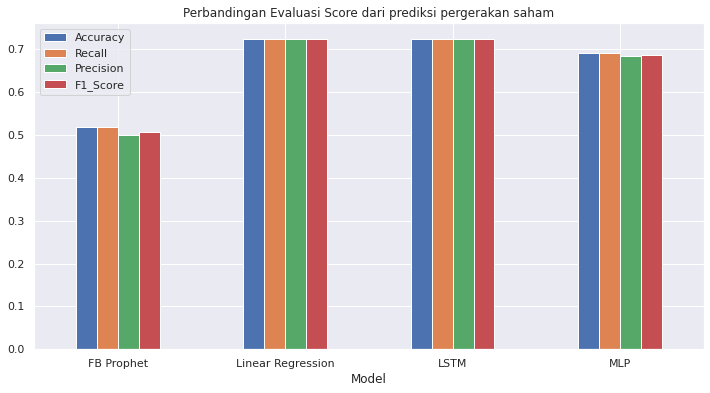

In [ ]:
df_movement_evaluation.groupby('Model')['Accuracy',	'Recall',	'Precision',	'F1_Score'].sum().plot(kind='bar',figsize=(12,6))
plt.xticks([0,1,2,3], rotation=0, labels=['FB Prophet','Linear Regression','LSTM','MLP'])
plt.title('Perbandingan Evaluasi Score dari prediksi pergerakan saham')
plt.show()

#HRUM

In [ ]:
df_hrum = pd.read_csv('/content/HRUM.JK.csv')
df_hrum['Date'] = pd.to_datetime(df_hrum['Date'])
df_hrum

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-01-02,2140.0,2140.0,2140.0,2140.0,1906.557861,0.0
1,2017-01-03,2160.0,2210.0,2120.0,2200.0,1960.012695,4341100.0
2,2017-01-04,2200.0,2200.0,2140.0,2160.0,1924.376099,2704100.0
3,2017-01-05,2160.0,2190.0,2100.0,2110.0,1879.830444,2606400.0
4,2017-01-06,2110.0,2150.0,2100.0,2120.0,1888.739624,2903100.0
...,...,...,...,...,...,...,...
1346,2022-05-13,10300.0,10725.0,9950.0,10525.0,10525.000000,30490100.0
1347,2022-05-17,10700.0,10975.0,10600.0,10975.0,10975.000000,20756400.0
1348,2022-05-18,11150.0,11175.0,10700.0,10975.0,10975.000000,19599600.0
1349,2022-05-19,10500.0,10825.0,10375.0,10700.0,10700.000000,21788600.0


In [ ]:
new_df_hrum = df_hrum.merge(df_date, on=['Date'], how='right')
new_df_hrum

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-01-01,NaN,NaN,NaN,NaN,NaN,NaN
1,2017-01-02,2140.0,2140.0,2140.0,2140.0,1906.557861,0.0
2,2017-01-03,2160.0,2210.0,2120.0,2200.0,1960.012695,4341100.0
3,2017-01-04,2200.0,2200.0,2140.0,2160.0,1924.376099,2704100.0
4,2017-01-05,2160.0,2190.0,2100.0,2110.0,1879.830444,2606400.0
...,...,...,...,...,...,...,...
1961,2022-05-16,NaN,NaN,NaN,NaN,NaN,NaN
1962,2022-05-17,10700.0,10975.0,10600.0,10975.0,10975.000000,20756400.0
1963,2022-05-18,11150.0,11175.0,10700.0,10975.0,10975.000000,19599600.0
1964,2022-05-19,10500.0,10825.0,10375.0,10700.0,10700.000000,21788600.0


In [ ]:
hrum_full = new_df_hrum[['Date','Close']]
hrum_full['Close'] = hrum_full['Close'].interpolate(method='linear',limit_direction ='forward')
hrum_full = hrum_full[1:].reset_index(drop=True)
hrum_full

,Date,Close
0,2017-01-02,2140.0
1,2017-01-03,2200.0
2,2017-01-04,2160.0
3,2017-01-05,2110.0
4,2017-01-06,2120.0
...,...,...
1960,2022-05-16,10862.5
1961,2022-05-17,10975.0
1962,2022-05-18,10975.0
1963,2022-05-19,10700.0


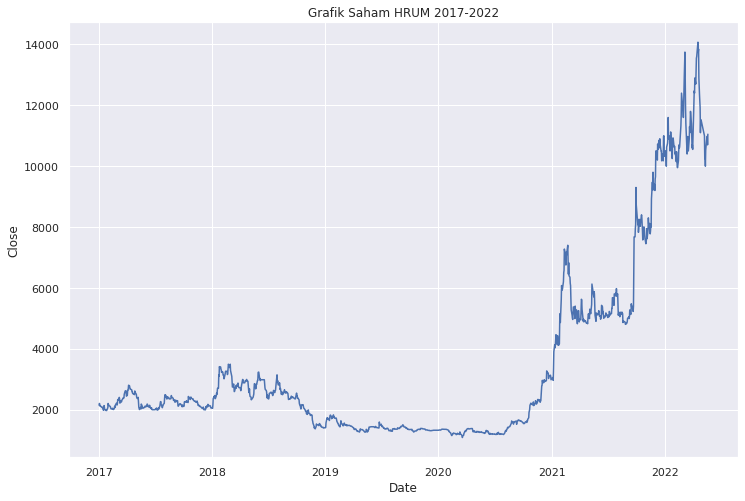

In [ ]:
plt.figure(figsize=(12,8))
sns.lineplot(data=hrum_full, x='Date',y='Close')
plt.title('Grafik Saham HRUM 2017-2022')
sns.set_theme()

In [ ]:
df_pred_hrum = pd.DataFrame({
    'ds' : hrum_full['Date'],
    'y' : hrum_full['Close']
})
df_pred_hrum

,ds,y
0,2017-01-02,2140.0
1,2017-01-03,2200.0
2,2017-01-04,2160.0
3,2017-01-05,2110.0
4,2017-01-06,2120.0
...,...,...
1960,2022-05-16,10862.5
1961,2022-05-17,10975.0
1962,2022-05-18,10975.0
1963,2022-05-19,10700.0


## FB Prophet

In [ ]:
train_proph_hrum = df_pred_hrum.iloc[:-30]
test_proph_hrum = df_pred_hrum.iloc[-30:]

test_proph_hrum.reset_index(inplace=True)

In [ ]:
m = Prophet(weekly_seasonality=True, yearly_seasonality=True)
m.fit(train_proph_hrum)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
future = m.make_future_dataframe(360,include_history=False)

forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head()

,ds,yhat,yhat_lower,yhat_upper
0,2022-04-21,12114.106116,11493.330806,12773.537015
1,2022-04-22,12103.796391,11504.640057,12666.354256
2,2022-04-23,12088.370910,11435.888402,12696.381653
3,2022-04-24,12072.986170,11444.092509,12668.617687
4,2022-04-25,12060.651827,11482.256648,12660.350554


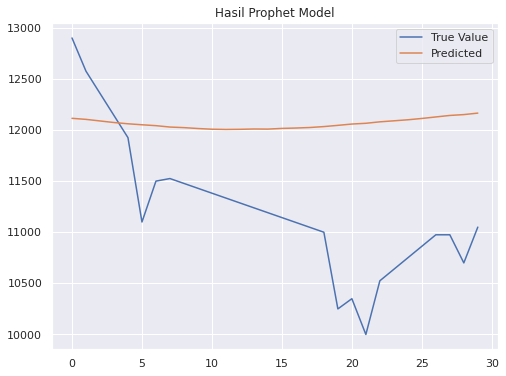

In [ ]:
plt.figure(figsize=(8,6))
test_proph_hrum['y'].plot(label='True Value')
forecast['yhat'][:30].plot(label='Predicted')
plt.title('Hasil Prophet Model')
plt.legend()

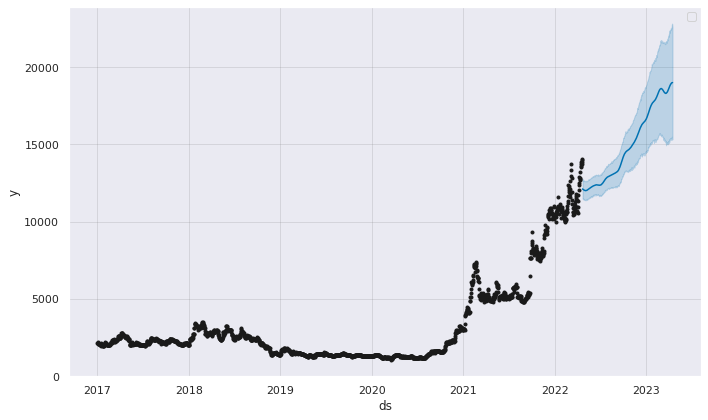

In [ ]:
# only future data

fig1 = m.plot(forecast)
plt.legend()

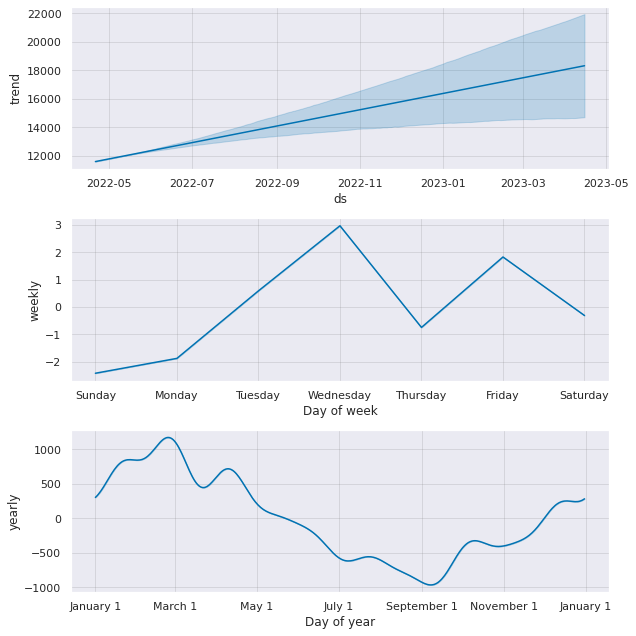

In [ ]:
fig2 = m.plot_components(forecast)

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
# import numpy as np j
print("Prophet Model")
print("MAE: ",mean_absolute_error(test_proph_hrum['y'],forecast['yhat'][:30]))
print("MSE: ",mean_squared_error(test_proph_hrum['y'],forecast['yhat'][:30]))
print("RMSE: ", np.sqrt(mean_squared_error(test_proph_hrum['y'],forecast['yhat'][:30])))
print("MAPE: ",mean_absolute_percentage_error(test_proph_hrum['y'],forecast['yhat'][:30])*100)
print("R2: ",r2_score(test_proph_hrum['y'],forecast['yhat'][:30]))
print("")

Prophet Model
MAE:  944.3828669461695
MSE:  1121428.2052210334
RMSE:  1058.9750729932377
MAPE:  8.651677031630117
R2:  -1.687771779925582



In [ ]:
# Labelling Data Aktual

df_pred_class_hrum = hrum_full[-30:].copy().rename(columns={'Close':'y_true'}).reset_index(drop=True)

# df_pred_class['y_true'] = test['y']

label = []
prctg = []
for idx,data in enumerate(df_pred_class_hrum['y_true']):
    if idx != (len(df_pred_class_hrum)-1):

        prctg_value = round((abs(df_pred_class_hrum['y_true'][idx+1] - data)/data)*100, ndigits=2)
        prctg.append(prctg_value)
        if data < df_pred_class_hrum['y_true'][idx+1]:
            label.append('Naik')
        elif data > df_pred_class_hrum['y_true'][idx+1]:
            label.append('Turun')
        else:
            label.append('Tetap')

df_pred_class_hrum['label_true'] = np.NaN
df_pred_class_hrum['label_true'][1:] = label

df_pred_class_hrum['prctg_true'] = np.NaN
df_pred_class_hrum['prctg_true'][1:] = prctg
df_pred_class_hrum

,Date,y_true,label_true,prctg_true
0,2022-04-21,12900.000000,NaN,NaN
1,2022-04-22,12575.000000,Turun,2.52
2,2022-04-23,12358.333333,Turun,1.72
3,2022-04-24,12141.666667,Turun,1.75
4,2022-04-25,11925.000000,Turun,1.78
5,2022-04-26,11100.000000,Turun,6.92
6,2022-04-27,11500.000000,Naik,3.60
7,2022-04-28,11525.000000,Naik,0.22
8,2022-04-29,11477.272727,Turun,0.41
9,2022-04-30,11429.545455,Turun,0.42


In [ ]:
# DATAFRAME UNTUK MELIHAT PERGERAKAN HARGA SAHAM (NAIK/TURUN/TETAP)

df_pred_class_hrum['hrum_prophet'] = forecast['yhat'][:30]

# df_pred_class_hrum.reset_index(drop=True, inplace=True)

# Labelling Data hasil prediksi

label = []
prctg = []
for idx,data in enumerate(df_pred_class_hrum['hrum_prophet']):
    if idx != (len(df_pred_class_hrum)-1):
        prctg_value = round((abs(df_pred_class_hrum['hrum_prophet'][idx+1] - data)/data)*100, ndigits=2)
        prctg.append(prctg_value)
        if data < df_pred_class_hrum['hrum_prophet'][idx+1]:
            label.append('Naik')
        elif data > df_pred_class_hrum['hrum_prophet'][idx+1]:
            label.append('Turun')
        else:
            label.append('Tetap')

df_pred_class_hrum['label_fb_prophet'] = np.NaN
df_pred_class_hrum['label_fb_prophet'][1:] = label

df_pred_class_hrum['prctg_prophet'] = np.NaN
df_pred_class_hrum['prctg_prophet'][1:] = prctg
df_pred_class_hrum

,Date,y_true,label_true,prctg_true,hrum_prophet,label_fb_prophet,prctg_prophet
0,2022-04-21,12900.000000,NaN,NaN,12114.106116,NaN,NaN
1,2022-04-22,12575.000000,Turun,2.52,12103.796391,Turun,0.09
2,2022-04-23,12358.333333,Turun,1.72,12088.370910,Turun,0.13
3,2022-04-24,12141.666667,Turun,1.75,12072.986170,Turun,0.13
4,2022-04-25,11925.000000,Turun,1.78,12060.651827,Turun,0.10
5,2022-04-26,11100.000000,Turun,6.92,12050.983307,Turun,0.08
6,2022-04-27,11500.000000,Naik,3.60,12042.272439,Turun,0.07
7,2022-04-28,11525.000000,Naik,0.22,12028.764545,Turun,0.11
8,2022-04-29,11477.272727,Turun,0.41,12023.076698,Turun,0.05
9,2022-04-30,11429.545455,Turun,0.42,12014.352504,Turun,0.07


## MLP

In [ ]:
df_ml = hrum_full[['Close']]
df_ml.tail()

,Close
1960,10862.5
1961,10975.0
1962,10975.0
1963,10700.0
1964,11050.0


In [ ]:
# Train Test Sebelum di Normalisasi

train_data = df_ml.iloc[:-30]
test_data = df_ml.iloc[-30:]

**Untuk normalisasi data**

- Data frame dibagi train,test terlebih dahulu
- kemudian data train di scaling
- kemudian scaler di transform ke train dan test
- setelah di transform , train dan test digabung kembali
- baru kemudian di hitung lag datanya
- kemudian di bagi lagi menjadi train dan test

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, MaxAbsScaler, QuantileTransformer
scaler = MinMaxScaler()
# y = np.array(df_encode['Balance']).reshape(-1,1)
columns = list(train_data.columns)
scaler.fit(train_data[columns])

train_scaled = scaler.transform(train_data)
test_scaled = scaler.transform(test_data)

train_data[columns] = train_scaled
test_data[columns] = test_scaled

In [ ]:
df_ml_scaled = train_data.append(test_data)

In [ ]:
lag_df = LaggedFeatures(df_ml_scaled, lag=5, fillna=True, dropna=True)
lag_df.tail()

,Close,Close_lag1,Close_lag2,Close_lag3,Close_lag4,Close_lag5
1960,0.752790,0.744132,0.735475,0.726818,0.686418,0.713351
1961,0.761447,0.752790,0.744132,0.735475,0.726818,0.686418
1962,0.761447,0.761447,0.752790,0.744132,0.735475,0.726818
1963,0.740285,0.761447,0.761447,0.752790,0.744132,0.735475
1964,0.767218,0.740285,0.761447,0.761447,0.752790,0.744132


In [ ]:
train = lag_df.iloc[:-30]
test = lag_df.iloc[-30:]

In [ ]:
X_train = train.drop("Close", axis=1)
X_test = test.drop("Close", axis=1)

y_train = train["Close"]
y_test = test["Close"]

X_train = X_train.astype(float).values
y_train = y_train.astype(float).values

X_test = X_test.astype(float).values
y_test = y_test.astype(float).values

In [ ]:
y_test_transform = scaler.inverse_transform([y_test])[0]
y_test_transform

array([12900.        , 12575.        , 12358.33333333, 12141.66666667,
       11925.        , 11100.        , 11500.        , 11525.        ,
       11477.27272727, 11429.54545455, 11381.81818182, 11334.09090909,
       11286.36363636, 11238.63636364, 11190.90909091, 11143.18181818,
       11095.45454545, 11047.72727273, 11000.        , 10250.        ,
       10350.        , 10000.        , 10525.        , 10637.5       ,
       10750.        , 10862.5       , 10975.        , 10975.        ,
       10700.        , 11050.        ])

MLP
MAE:  524.1013351517337
MSE:  456103.8832292617
RMSE:  675.354635157901
MAPE:  4.598392461187913
R2:  -0.09316239804799387



Text(0.5, 1.0, 'Hasil Prediksi MLP')

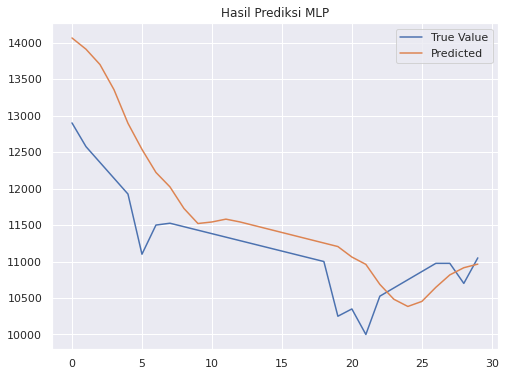

In [ ]:
from sklearn.neural_network import MLPRegressor

mlp = MLPRegressor(hidden_layer_sizes=(150,100,50),
                       max_iter = 300,activation = 'identity',
                       solver = 'lbfgs')
mlp.fit(X_train, y_train)
y_pred_mlp = mlp.predict(X_test)
y_pred_transform = scaler.inverse_transform([y_pred_mlp])[0]

print("MLP")
print("MAE: ",mean_absolute_error(y_test_transform,y_pred_transform))
print("MSE: ",mean_squared_error(y_test_transform,y_pred_transform))
print("RMSE: ", np.sqrt(mean_squared_error(y_test_transform,y_pred_transform)))
print("MAPE: ",mean_absolute_percentage_error(y_test_transform,y_pred_transform)*100)
print("R2: ",r2_score(y_test_transform,y_pred_transform))
print("")

plt.figure(figsize=(8,6))
plt.plot(y_test_transform, label='True Value')
plt.plot(y_pred_transform,label='Predicted')
plt.legend()
plt.title('Hasil Prediksi MLP')

In [ ]:
df_pred_class_hrum['hrum_mlp'] = y_pred_transform

label = []
prctg = []
for idx,data in enumerate(df_pred_class_hrum['hrum_mlp']):
    if idx != (len(df_pred_class_hrum)-1):
        prctg_value = round((abs(df_pred_class_hrum['hrum_mlp'][idx+1] - data)/data)*100, ndigits=2)
        prctg.append(prctg_value)
        if data < df_pred_class_hrum['hrum_mlp'][idx+1]:
            label.append('Naik')
        elif data > df_pred_class_hrum['hrum_mlp'][idx+1]:
            label.append('Turun')
        else:
            label.append('Tetap')

df_pred_class_hrum['label_mlp'] = np.NaN
df_pred_class_hrum['label_mlp'][1:] = label

df_pred_class_hrum['prctg_mlp'] = np.NaN
df_pred_class_hrum['prctg_mlp'][1:] = prctg

df_pred_class_hrum

,Date,y_true,label_true,prctg_true,hrum_prophet,label_fb_prophet,prctg_prophet,hrum_mlp,label_mlp,prctg_mlp
0,2022-04-21,12900.000000,NaN,NaN,12114.106116,NaN,NaN,14064.469755,NaN,NaN
1,2022-04-22,12575.000000,Turun,2.52,12103.796391,Turun,0.09,13910.531887,Turun,1.09
2,2022-04-23,12358.333333,Turun,1.72,12088.370910,Turun,0.13,13700.114596,Turun,1.51
3,2022-04-24,12141.666667,Turun,1.75,12072.986170,Turun,0.13,13356.004906,Turun,2.51
4,2022-04-25,11925.000000,Turun,1.78,12060.651827,Turun,0.10,12894.961125,Turun,3.45
5,2022-04-26,11100.000000,Turun,6.92,12050.983307,Turun,0.08,12537.502991,Turun,2.77
6,2022-04-27,11500.000000,Naik,3.60,12042.272439,Turun,0.07,12221.058277,Turun,2.52
7,2022-04-28,11525.000000,Naik,0.22,12028.764545,Turun,0.11,12023.233515,Turun,1.62
8,2022-04-29,11477.272727,Turun,0.41,12023.076698,Turun,0.05,11727.388589,Turun,2.46
9,2022-04-30,11429.545455,Turun,0.42,12014.352504,Turun,0.07,11521.007012,Turun,1.76


## Linear Regression

MLP
MAE:  221.13374671721073
MSE:  111518.35960400854
RMSE:  333.94364734788496
MAPE:  1.9682502313132524
R2:  0.7327194924367277



Text(0.5, 1.0, 'Hasil Prediksi LR')

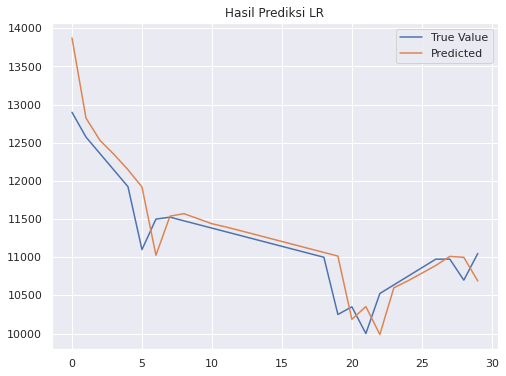

In [ ]:
from sklearn.linear_model import LinearRegression

LR = LinearRegression()
LR.fit(X_train, y_train)
y_pred_lr = LR.predict(X_test)
y_pred_lr_transform = scaler.inverse_transform([y_pred_lr])[0]

print("MLP")
print("MAE: ",mean_absolute_error(y_test_transform,y_pred_lr_transform))
print("MSE: ",mean_squared_error(y_test_transform,y_pred_lr_transform))
print("RMSE: ", np.sqrt(mean_squared_error(y_test_transform,y_pred_lr_transform)))
print("MAPE: ",mean_absolute_percentage_error(y_test_transform,y_pred_lr_transform)*100)
print("R2: ",r2_score(y_test_transform,y_pred_lr_transform))
print("")

plt.figure(figsize=(8,6))
plt.plot(y_test_transform, label='True Value')
plt.plot(y_pred_lr_transform,label='Predicted')
plt.legend()
plt.title('Hasil Prediksi LR')

In [ ]:
df_pred_class_hrum['hrum_lr'] = y_pred_lr_transform

# df_pred_class_hrum.reset_index(drop=True, inplace=True)

# Labelling Data hasil prediksi

label = []
prctg = []
for idx,data in enumerate(df_pred_class_hrum['hrum_lr']):
    if idx != (len(df_pred_class_hrum)-1):
        prctg_value = round((abs(df_pred_class_hrum['hrum_lr'][idx+1] - data)/data)*100, ndigits=2)
        prctg.append(prctg_value)
        if data < df_pred_class_hrum['hrum_lr'][idx+1]:
            label.append('Naik')
        elif data > df_pred_class_hrum['hrum_lr'][idx+1]:
            label.append('Turun')
        else:
            label.append('Tetap')

df_pred_class_hrum['label_lr'] = np.NaN
df_pred_class_hrum['label_lr'][1:] = label

df_pred_class_hrum['prctg_lr'] = np.NaN
df_pred_class_hrum['prctg_lr'][1:] = prctg
df_pred_class_hrum

,Date,y_true,label_true,prctg_true,hrum_prophet,label_fb_prophet,prctg_prophet,hrum_mlp,label_mlp,prctg_mlp,hrum_lr,label_lr,prctg_lr
0,2022-04-21,12900.000000,NaN,NaN,12114.106116,NaN,NaN,14064.469755,NaN,NaN,13873.895270,NaN,NaN
1,2022-04-22,12575.000000,Turun,2.52,12103.796391,Turun,0.09,13910.531887,Turun,1.09,12824.155641,Turun,7.57
2,2022-04-23,12358.333333,Turun,1.72,12088.370910,Turun,0.13,13700.114596,Turun,1.51,12531.750259,Turun,2.28
3,2022-04-24,12141.666667,Turun,1.75,12072.986170,Turun,0.13,13356.004906,Turun,2.51,12348.127056,Turun,1.47
4,2022-04-25,11925.000000,Turun,1.78,12060.651827,Turun,0.10,12894.961125,Turun,3.45,12147.522106,Turun,1.62
5,2022-04-26,11100.000000,Turun,6.92,12050.983307,Turun,0.08,12537.502991,Turun,2.77,11921.427036,Turun,1.86
6,2022-04-27,11500.000000,Naik,3.60,12042.272439,Turun,0.07,12221.058277,Turun,2.52,11026.292560,Turun,7.51
7,2022-04-28,11525.000000,Naik,0.22,12028.764545,Turun,0.11,12023.233515,Turun,1.62,11538.611561,Naik,4.65
8,2022-04-29,11477.272727,Turun,0.41,12023.076698,Turun,0.05,11727.388589,Turun,2.46,11571.316617,Naik,0.28
9,2022-04-30,11429.545455,Turun,0.42,12014.352504,Turun,0.07,11521.007012,Turun,1.76,11505.412938,Turun,0.57


## LSTM

In [ ]:
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import Flatten
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [ ]:
trainX = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
testX = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

In [ ]:
trainX.shape

(1930, 1, 5)

In [ ]:
model = Sequential()
model.add(LSTM(96,return_sequences = True, input_shape=(1, 5)))
model.add(Dropout(0.2))
model.add(LSTM(96,return_sequences = True))
model.add(Dropout(0.2))
model.add(LSTM(96,return_sequences = True))
model.add(Dropout(0.2))
model.add(LSTM(96,return_sequences = True))
model.add(Flatten())
model.add(Dropout(0.2))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adamax')
print(model.summary())

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_16 (LSTM)              (None, 1, 96)             39168     
                                                                 
 dropout_16 (Dropout)        (None, 1, 96)             0         
                                                                 
 lstm_17 (LSTM)              (None, 1, 96)             74112     
                                                                 
 dropout_17 (Dropout)        (None, 1, 96)             0         
                                                                 
 lstm_18 (LSTM)              (None, 1, 96)             74112     
                                                                 
 dropout_18 (Dropout)        (None, 1, 96)             0         
                                                                 
 lstm_19 (LSTM)              (None, 1, 96)            

In [ ]:
50 epochs

In [ ]:
history = model.fit(trainX, y_train, epochs=50, batch_size=8, verbose=2)

Epoch 1/50
242/242 - 16s - loss: 0.0190 - 16s/epoch - 67ms/step
Epoch 2/50
242/242 - 2s - loss: 0.0021 - 2s/epoch - 10ms/step
Epoch 3/50
242/242 - 2s - loss: 0.0017 - 2s/epoch - 9ms/step
Epoch 4/50
242/242 - 2s - loss: 0.0015 - 2s/epoch - 10ms/step
Epoch 5/50
242/242 - 2s - loss: 0.0014 - 2s/epoch - 9ms/step
Epoch 6/50
242/242 - 2s - loss: 0.0013 - 2s/epoch - 7ms/step
Epoch 7/50
242/242 - 2s - loss: 0.0011 - 2s/epoch - 7ms/step
Epoch 8/50
242/242 - 2s - loss: 9.7297e-04 - 2s/epoch - 7ms/step
Epoch 9/50
242/242 - 2s - loss: 0.0010 - 2s/epoch - 7ms/step
Epoch 10/50
242/242 - 2s - loss: 9.7013e-04 - 2s/epoch - 7ms/step
Epoch 11/50
242/242 - 2s - loss: 8.3539e-04 - 2s/epoch - 7ms/step
Epoch 12/50
242/242 - 2s - loss: 9.5734e-04 - 2s/epoch - 7ms/step
Epoch 13/50
242/242 - 2s - loss: 9.0058e-04 - 2s/epoch - 7ms/step
Epoch 14/50
242/242 - 2s - loss: 8.9882e-04 - 2s/epoch - 7ms/step
Epoch 15/50
242/242 - 2s - loss: 8.7843e-04 - 2s/epoch - 7ms/step
Epoch 16/50
242/242 - 2s - loss: 9.5075e-04 - 

LSTM
MAE:  226.17827888257574
MSE:  100826.92091445666
RMSE:  317.53255095258606
MAPE:  2.0463855597535594
R2:  0.7583440906613803



Text(0.5, 1.0, 'Hasil Prediksi LSTM')

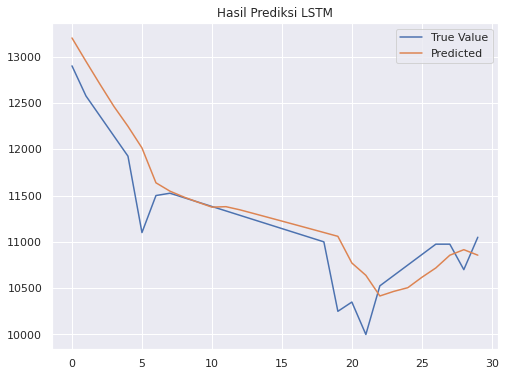

In [ ]:
y_pred_lstm = model.predict(testX)
y_pred_lstm_transform = scaler.inverse_transform(y_pred_lstm)

print("LSTM")
print("MAE: ",mean_absolute_error(y_test_transform,y_pred_lstm_transform))
print("MSE: ",mean_squared_error(y_test_transform,y_pred_lstm_transform))
print("RMSE: ", np.sqrt(mean_squared_error(y_test_transform,y_pred_lstm_transform)))
print("MAPE: ",mean_absolute_percentage_error(y_test_transform,y_pred_lstm_transform)*100)
print("R2: ",r2_score(y_test_transform,y_pred_lstm_transform))
print("")

plt.figure(figsize=(8,6))
plt.plot(y_test_transform, label='True Value')
plt.plot(y_pred_lstm_transform,label='Predicted')
plt.legend()
plt.title('Hasil Prediksi LSTM')

In [ ]:
df_pred_class_hrum['hrum_lstm'] = y_pred_lstm_transform

# df_pred_class.reset_index(drop=True, inplace=True)

# Labelling Data hasil prediksi

label = []
prctg = []

for idx,data in enumerate(df_pred_class_hrum['hrum_lstm']):
    if idx != (len(df_pred_class_hrum)-1):
        prctg_value = round((abs(df_pred_class_hrum['hrum_lstm'][idx+1] - data)/data)*100, ndigits=2)
        prctg.append(prctg_value)
        if data < df_pred_class_hrum['hrum_lstm'][idx+1]:
            label.append('Naik')
        elif data > df_pred_class_hrum['hrum_lstm'][idx+1]:
            label.append('Turun')
        else:
            label.append('Tetap')

df_pred_class_hrum['label_lstm'] = np.NaN
df_pred_class_hrum['label_lstm'][1:] = label

df_pred_class_hrum['prctg_lstm'] = np.NaN
df_pred_class_hrum['prctg_lstm'][1:] = prctg
df_pred_class_hrum

,Date,y_true,label_true,prctg_true,hrum_prophet,label_fb_prophet,prctg_prophet,hrum_mlp,label_mlp,prctg_mlp,hrum_lr,label_lr,prctg_lr,hrum_lstm,label_lstm,prctg_lstm
0,2022-04-21,12900.000000,NaN,NaN,12114.106116,NaN,NaN,14064.469755,NaN,NaN,13873.895270,NaN,NaN,13201.244141,NaN,NaN
1,2022-04-22,12575.000000,Turun,2.52,12103.796391,Turun,0.09,13910.531887,Turun,1.09,12824.155641,Turun,7.57,12948.531250,Turun,1.91
2,2022-04-23,12358.333333,Turun,1.72,12088.370910,Turun,0.13,13700.114596,Turun,1.51,12531.750259,Turun,2.28,12701.530273,Turun,1.91
3,2022-04-24,12141.666667,Turun,1.75,12072.986170,Turun,0.13,13356.004906,Turun,2.51,12348.127056,Turun,1.47,12461.378906,Turun,1.89
4,2022-04-25,11925.000000,Turun,1.78,12060.651827,Turun,0.10,12894.961125,Turun,3.45,12147.522106,Turun,1.62,12247.493164,Turun,1.72
5,2022-04-26,11100.000000,Turun,6.92,12050.983307,Turun,0.08,12537.502991,Turun,2.77,11921.427036,Turun,1.86,12013.916016,Turun,1.91
6,2022-04-27,11500.000000,Naik,3.60,12042.272439,Turun,0.07,12221.058277,Turun,2.52,11026.292560,Turun,7.51,11637.548828,Turun,3.13
7,2022-04-28,11525.000000,Naik,0.22,12028.764545,Turun,0.11,12023.233515,Turun,1.62,11538.611561,Naik,4.65,11547.274414,Turun,0.78
8,2022-04-29,11477.272727,Turun,0.41,12023.076698,Turun,0.05,11727.388589,Turun,2.46,11571.316617,Naik,0.28,11483.618164,Turun,0.55
9,2022-04-30,11429.545455,Turun,0.42,12014.352504,Turun,0.07,11521.007012,Turun,1.76,11505.412938,Turun,0.57,11427.989258,Turun,0.48


In [ ]:
df_pred_class_hrum.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Date              30 non-null     datetime64[ns]
 1   y_true            30 non-null     float64       
 2   label_true        29 non-null     object        
 3   prctg_true        29 non-null     float64       
 4   hrum_prophet      30 non-null     float64       
 5   label_fb_prophet  29 non-null     object        
 6   prctg_prophet     29 non-null     float64       
 7   hrum_mlp          30 non-null     float64       
 8   label_mlp         29 non-null     object        
 9   prctg_mlp         29 non-null     float64       
 10  hrum_lr           30 non-null     float64       
 11  label_lr          29 non-null     object        
 12  prctg_lr          29 non-null     float64       
 13  hrum_lstm         30 non-null     float32       
 14  label_lstm        29 non-nul

In [ ]:
df_pred_class_hrum.to_csv('HRUM_RESULT.CSV', index=False)

In [ ]:
# EVALUASI PREDIKSI MOVEMENT

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, recall_score, precision_score, f1_score
pred_columns = ['label_fb_prophet','label_mlp','label_lr','label_lstm']

for column in pred_columns:
  # print('#'*20)
  print('#'*20, column ,'#'*20)
  print(accuracy_score(df_pred_class_hrum[column][1:], df_pred_class_hrum['label_true'][1:]))
  print(confusion_matrix(df_pred_class_hrum[column][1:], df_pred_class_hrum['label_true'][1:]))
  print(classification_report(df_pred_class_hrum[column][1:], df_pred_class_hrum['label_true'][1:]))
  print()

#################### label_fb_prophet ####################
0.5862068965517241
[[ 7  1  9]
 [ 0  0  0]
 [ 2  0 10]]
              precision    recall  f1-score   support

        Naik       0.78      0.41      0.54        17
       Tetap       0.00      0.00      0.00         0
       Turun       0.53      0.83      0.65        12

    accuracy                           0.59        29
   macro avg       0.43      0.42      0.39        29
weighted avg       0.67      0.59      0.58        29


#################### label_mlp ####################
0.6551724137931034
[[ 3  1  3]
 [ 0  0  0]
 [ 6  0 16]]
              precision    recall  f1-score   support

        Naik       0.33      0.43      0.38         7
       Tetap       0.00      0.00      0.00         0
       Turun       0.84      0.73      0.78        22

    accuracy                           0.66        29
   macro avg       0.39      0.39      0.39        29
weighted avg       0.72      0.66      0.68        29


#############

In [ ]:
model_name = [] # model
acs = [] # accuracy
rcs = [] # reccall
pcs = [] # precision
f1s = [] # f1score

for column in pred_columns:
  # df_movement_evaluation['Model']
  model_name.append(column)
  acc = accuracy_score(df_pred_class_hrum[column][1:], df_pred_class_hrum['label_true'][1:])
  recall = recall_score(df_pred_class_hrum[column][1:], df_pred_class_hrum['label_true'][1:], average='weighted')
  precision = precision_score(df_pred_class_hrum[column][1:], df_pred_class_hrum['label_true'][1:],average='weighted')
  f1 = f1_score(df_pred_class_hrum[column][1:], df_pred_class_hrum['label_true'][1:],average='weighted')
  acs.append(acc)
  rcs.append(recall)
  pcs.append(precision)
  f1s.append(f1)

df_movement_evaluation = pd.DataFrame({
    'Model' : model_name,
    'Accuracy' : acs,
    'Recall' : rcs,
    'Precision' : pcs,
    'F1_Score' : f1s
})
df_movement_evaluation.sort_values('Accuracy',ascending=False)

,Model,Accuracy,Recall,Precision,F1_Score
2,label_lr,0.758621,0.758621,0.801170,0.777789
3,label_lstm,0.724138,0.724138,0.786046,0.749790
1,label_mlp,0.655172,0.655172,0.719298,0.682611
0,label_fb_prophet,0.586207,0.586207,0.673725,0.582613


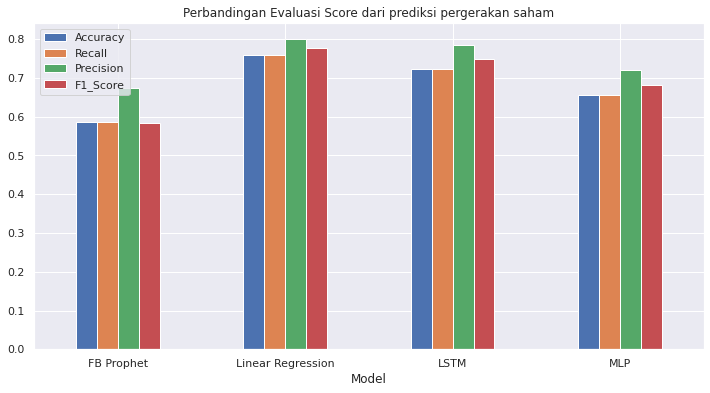

In [ ]:
df_movement_evaluation.groupby('Model')['Accuracy',	'Recall',	'Precision',	'F1_Score'].sum().plot(kind='bar',figsize=(12,6))
plt.xticks([0,1,2,3], rotation=0, labels=['FB Prophet','Linear Regression','LSTM','MLP'])
plt.title('Perbandingan Evaluasi Score dari prediksi pergerakan saham')
plt.show()

# FORECAST FUTURE DATA (data which not been known yet)

## Linear Regression

Model MLP memprediksi Senin 23 Mei 2022 nilai close saham BBCA TURUN pada angka : 7428.505803241419

Model Linear Regression memprediksi Senin 23 Mei 2022 nilai close saham BBCA TURUN pada angka : 7380.684548570684



In [ ]:
def stock_predict(days, hist_data, model):
    predict_values = []
    for day in range(days):
        tomorrow_close = model.predict([hist_data])[0]
        hist_data = hist_data[1:] + [tomorrow_close]
    # print('----')
    # print(hist_data)
        predict_values.append(tomorrow_close)
    return predict_values

data_pred = [ x[0] for x in scaler.transform(pd.DataFrame(hrum_full.tail()['Close']))]
predict_results = stock_predict(360,data_pred,LR)
# print('######')
# scaler.inverse_transform(predict_results)

# Conclusion

- Model Machine Learning cukup efektif ketika memprediksi jangka pendek, namun kurang baik untuk prediksi jangka panjang, karena data yang digunakan untuk memprediksi adalah data hasil prediksi sebelumnya

- berdasarkan evaluasi model forecasting sebelumnya, error dari model tidak terlalu besar namun angka ini cukup signifikan untuk error pada data saham 
- namun jika di lihat dari pergerakan sahamnya yaitu naik atau turun, model sudah cukup bagus untuk memperkirakan apakah saham akan naik atau turun dengan nilai akurasi sebesar 75%